# Chapter 5: Probability Distributions
- **A probability distribution describes how data is spread out and how likely certain values are to occur. The majority of values are clustered around the mean and the ends where fewer values occur are called the tail ends..**

- **Probability is how you describe the likelihood of an event occuring ranging from 0 to 1**

- **A standard normal distribution is a normla distribution where the mean is zero and the standard deviation is one**



__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 
### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

# Latex Mode = ((use of the $)) in markdown

**Imports**

In [1]:
import math, matplotlib.pyplot as plt, numpy as np, pandas as pd

from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

**Definitions**

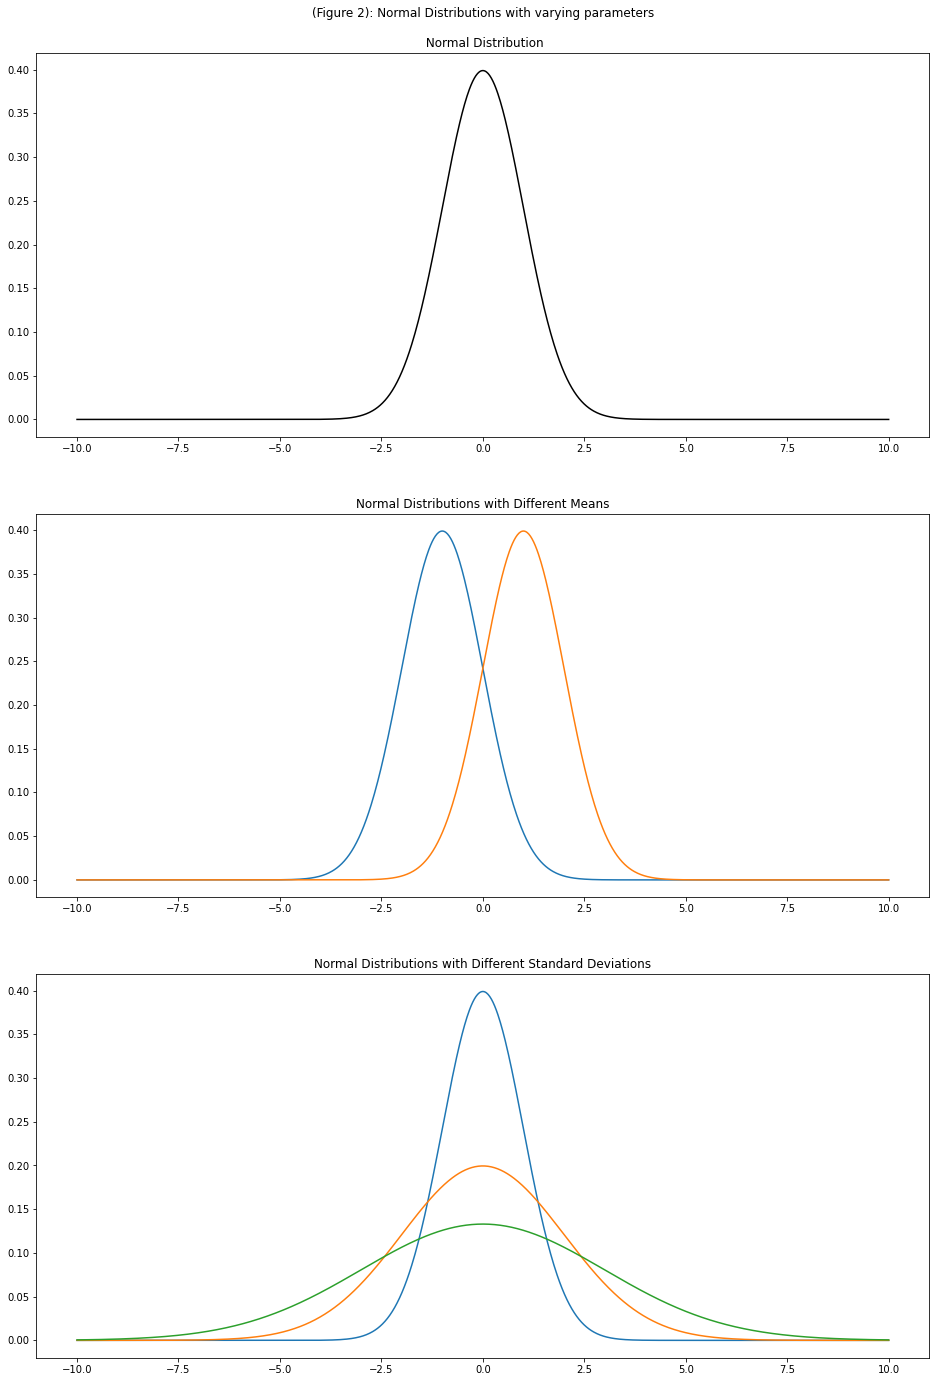

In [2]:
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000) ):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

# set up plot
fig, axs = plt.subplots(3, 1, figsize=(16, 24))
x = np.linspace(-10, 10, 1000)
# perform transformation
normal_dist_list = normal_dist(mean=0, sd=1)
axs[0].plot(x, normal_dist_list, label= "Normal Distribution", c='k')
axs[0].set_title("(Figure 2): Normal Distributions with varying parameters\n\n Normal Distribution")
# plot normal curves with varying means 
for mean_ in range(-1,3, 2):
    normal_dist_list = normal_dist(mean=mean_, sd=1)
    axs[1].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[1].set_title("Normal Distributions with Different Means")
    
# plot normal curves with varying standard deviations 
for sd in range(1,4):
    normal_dist_list = normal_dist(mean=0, sd=sd)
    axs[2].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[2].set_title("Normal Distributions with Different Standard Deviations")

#### These are all very self explanatory for anyone who has taken STAT330 and STAT331

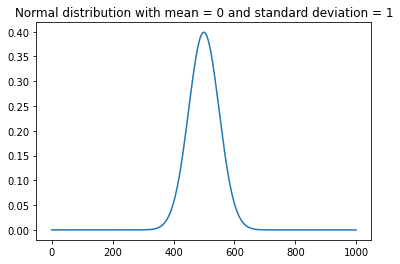

In [3]:
def normal_distribution(mu, sd, values):
    probdensity = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))
    return probdensity


# Generate a range of x values
values = np.linspace(-10,10,50)

mu = 0
sigma = 1
# Calculate the normal distribution at each x value
plot = normal_distribution(mu, sigma, values)

# Plot the normal distribution
plt.plot(plot)
plt.title('Normal distribution with mean = {} and standard deviation = {}'.format(mu, sigma))
plt.show()

###### If you do not make the data normalized you end up drawing incorrect inferences. The main point of this lesson is pro-tips for working with time-series data.

# Lognormal Distributions
- This is often referred to as z-score transformation
- We use these when the tails are extreme and with a positive skewness. So in order  to account for that effect we use a lognormal distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 


In [4]:
import warnings
warnings.filterwarnings("ignore")

def create_lognormal(mean, sd, x = np.linspace(0, 10, 1000)):
    density_points = (1 / x*sd*np.sqrt(2*math.pi))*math.e**(-(np.log(x)-mean)**2 / (2*sd**2))
    return density_points

Text(0.5, 1.0, 'Lognormal Distribution with μ = 0 and σ = 1')

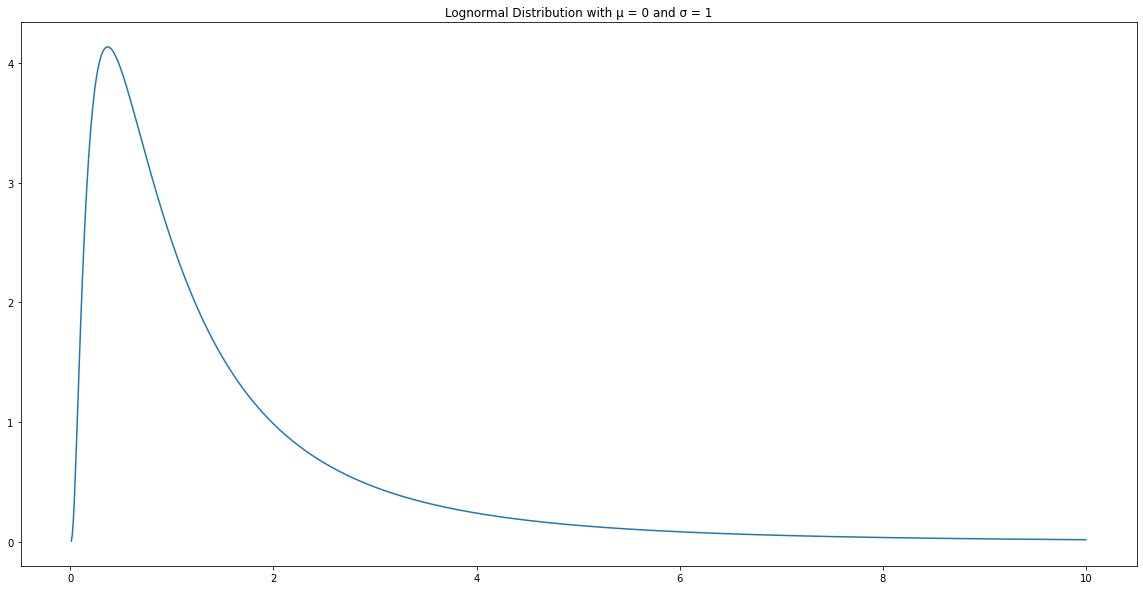

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0, 10, 1000)
log_norm = create_lognormal(0, 1,x)
ax.plot(x, log_norm)
mean,sd=1,1
ax.set_title("Lognormal Distribution with μ = 0 and σ = 1")

Text(0.5, 1.0, 'Lognorm Distr con mu = 1 and sigma = 1')

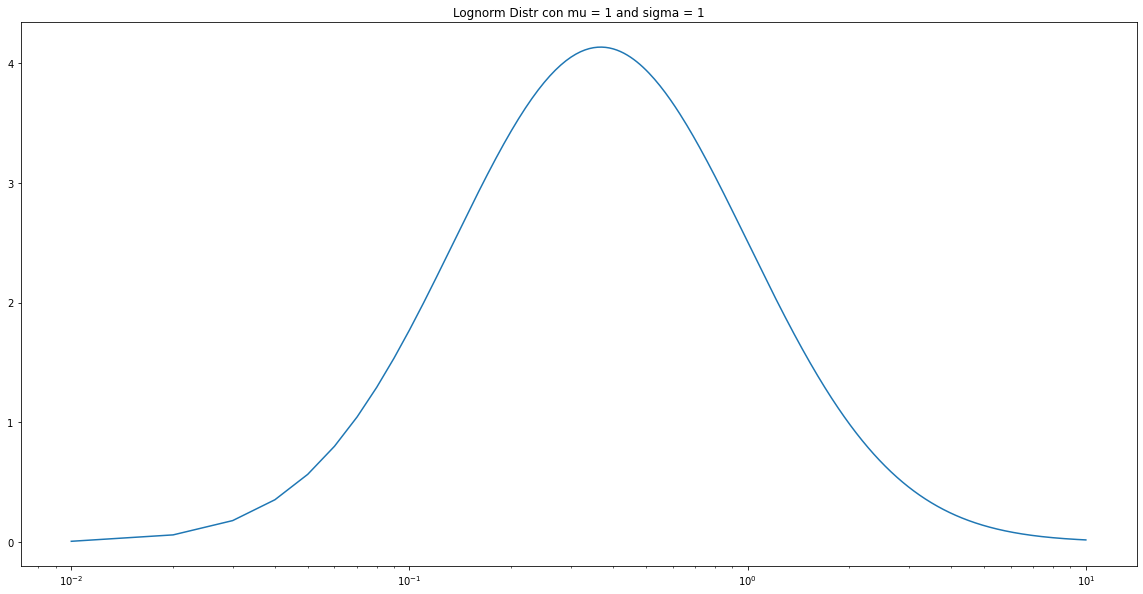

In [6]:
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,log_norm)
plt.xscale("log")
ax.set_title("Lognorm Distr con mu = " + str(mean) + " and sigma = " + str(sd))

# Binomial Distributions
- Use this where your outcomes are 0 or 1.

If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 

In [7]:
# build binomial function
def binomial(x, n, p):
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n - x)) * p**x * (1 - p)**(n - x)


In [8]:
binomial(x=50, n=100, p=.5)

0.07958923738717875

In [9]:
# Function to determine the probability of generating a total between x0 and x1 for a given p & n.

def prob_out(x0, x1, p, n):
    prob = 0
    for x in range(x0,x1+1):
        prob += binomial(x=x, n=n, p=p)
    return prob
p, n, x0, x1 = .5, 100, 40, 60

In [10]:
prob_out(x0, x1, p, n)

0.9647997997822952

In [11]:
p

0.5

n = 100
p = 0.5
P = 0
X0 = 40
X1 = 60
for x in range(X0, X1 +1):
    P += binomial(x=x,n=100,p=.5)
P

# More Imports

In [12]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


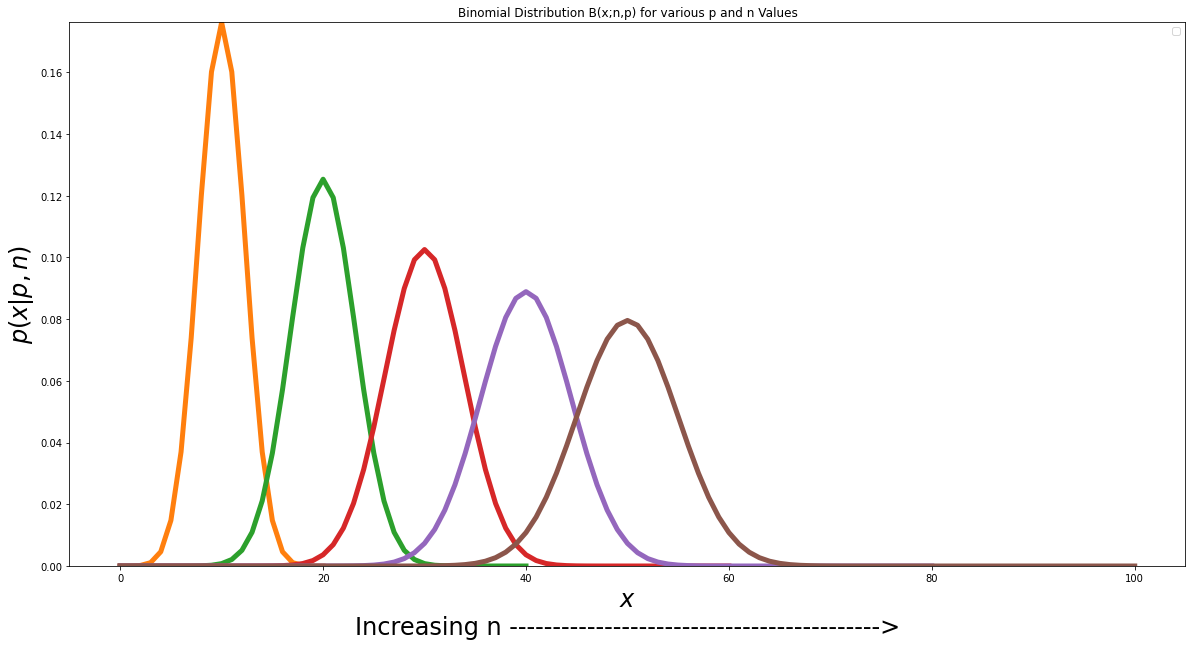

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
cmap = cm.get_cmap("Blues")
ymax = binomial(20 * p, 20, p)
for n in range(0,101,20):
    # List of probs for every possible outcome from 0 to n
    bivars = [binomial(x,n,p) for x in range(n+1)]
    # put them on a line
    plt.plot(bivars, linewidth=5)
ax.set_ylim(ymin=0,ymax=ymax)

# Put a title on it, make it look pretty
plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()
plt.show()

In [14]:
# Imports for datareader, yf, datetime
import pandas_datareader.data as web, yfinance as yf, datetime

In [15]:
data_dict = {}
yf.pdr_override()
start = datetime.datetime(2012,1,1)
end = datetime.datetime.today()
stocks = ['AAPL', 'PG', 'TSLA', 'SPY']
for stonk in stocks:
    data_dict[stonk] = web.get_data_yahoo(stonk,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
data_dict['AAPL']

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.500192   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.567369   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.706893   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.839728   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.819363   
...                ...         ...         ...         ...         ...   
2023-03-23  158.830002  161.550003  157.679993  158.929993  158.929993   
2023-03-24  158.860001  160.339996  157.850006  160.250000  160.250000   
2023-03-27  159.940002  160.770004  157.869995  158.279999  158.279999   
2023-03-28  157.970001  158.490005  155.979996  157.649994  157.649994   
2023-03-29  159.369995  161.050003  159.350006  160.770004  160.770004   

               Volume  
Date                   
2012-01-03  302220800  
2012-01-04  260022000  
2012-01-05  271269600  
2012-01-06  318292800  
2012-01-09  394024400  
...               ...  
2023-03-23   67622100  
2023-03-24   59196500  
2023-03-27   52390300  
2023-03-28   45992200  
2023-03-29   51251300  

[2828 rows x 6 columns]

# Make a df for the close data of all the stonks

In [17]:
cls_data = pd.concat([df['Close'] for df in data_dict.values()], 
                    keys = data_dict.keys(),
                    axis = 1)

In [18]:
cls_data

AAPL          PG        TSLA         SPY
Date                                                      
2012-01-03   14.686786   66.830002    1.872000  127.500000
2012-01-04   14.765714   66.800003    1.847333  127.699997
2012-01-05   14.929643   66.519997    1.808000  128.039993
2012-01-06   15.085714   66.360001    1.794000  127.709999
2012-01-09   15.061786   66.639999    1.816667  128.020004
...                ...         ...         ...         ...
2023-03-23  158.929993  143.789993  192.220001  393.170013
2023-03-24  160.250000  146.720001  190.410004  395.750000
2023-03-27  158.279999  145.949997  191.809998  396.489990
2023-03-28  157.649994  146.360001  189.190002  395.600006
2023-03-29  160.770004  146.809998  193.880005  401.350006

[2828 rows x 4 columns]

Text(0.5, 1.0, 'Daily Stock Prices')

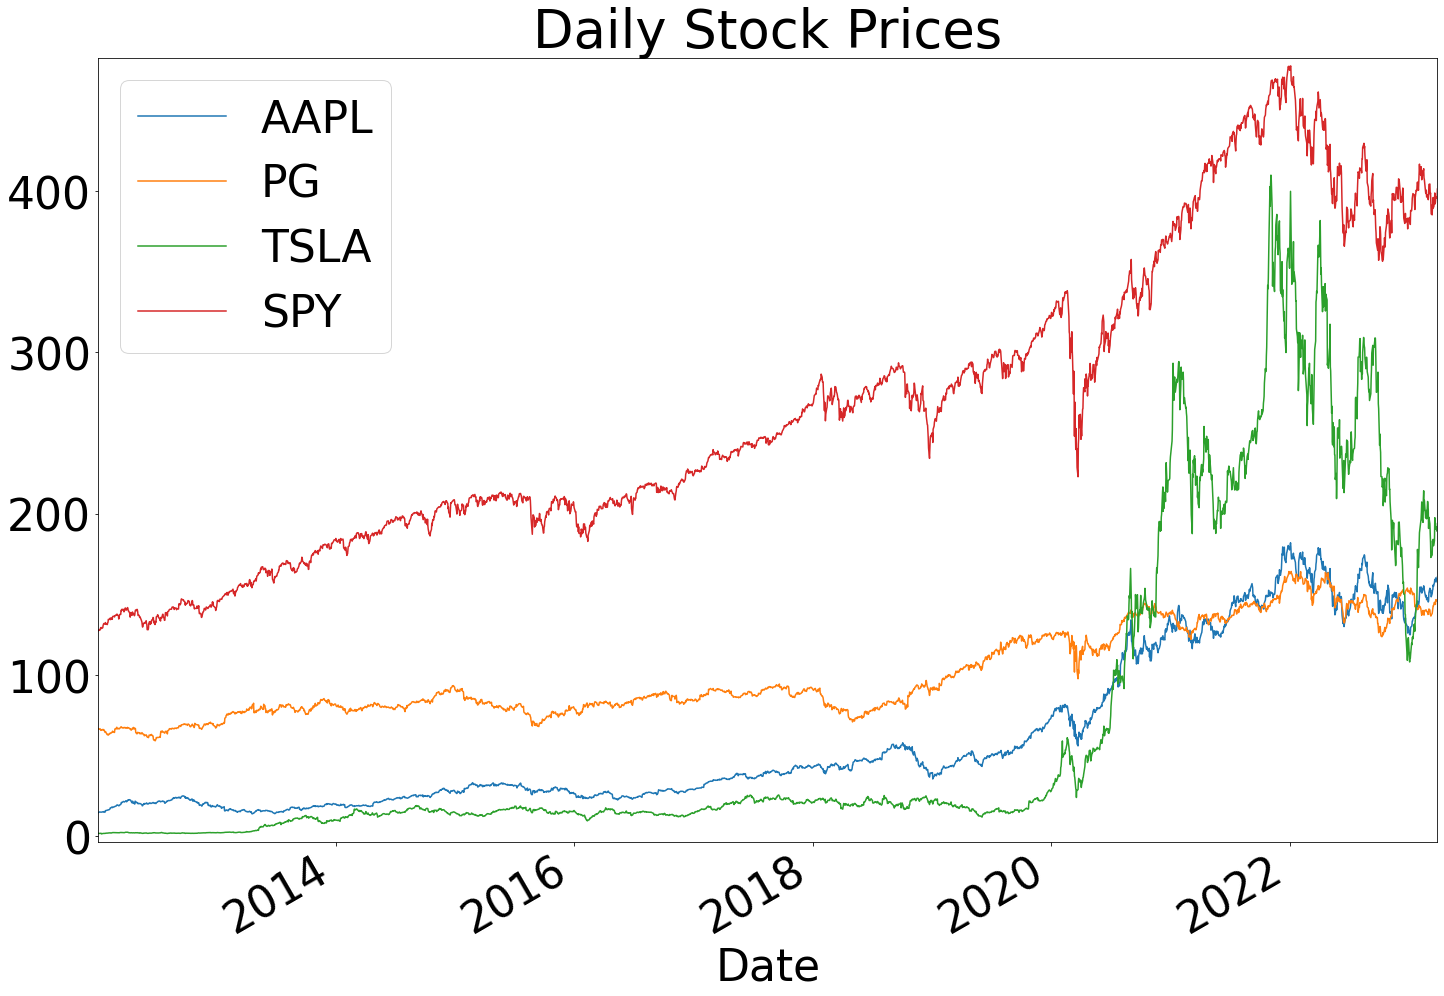

In [19]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams.update({'font.size':44})
fig,ax=plt.subplots(figsize=(24,16))
cls_data.plot.line(ax=ax,legend=True)
ax.set_title("Daily Stock Prices")

# Making comparisons using log scale
- Looking at change on a proportional basis rather than an absolute basis

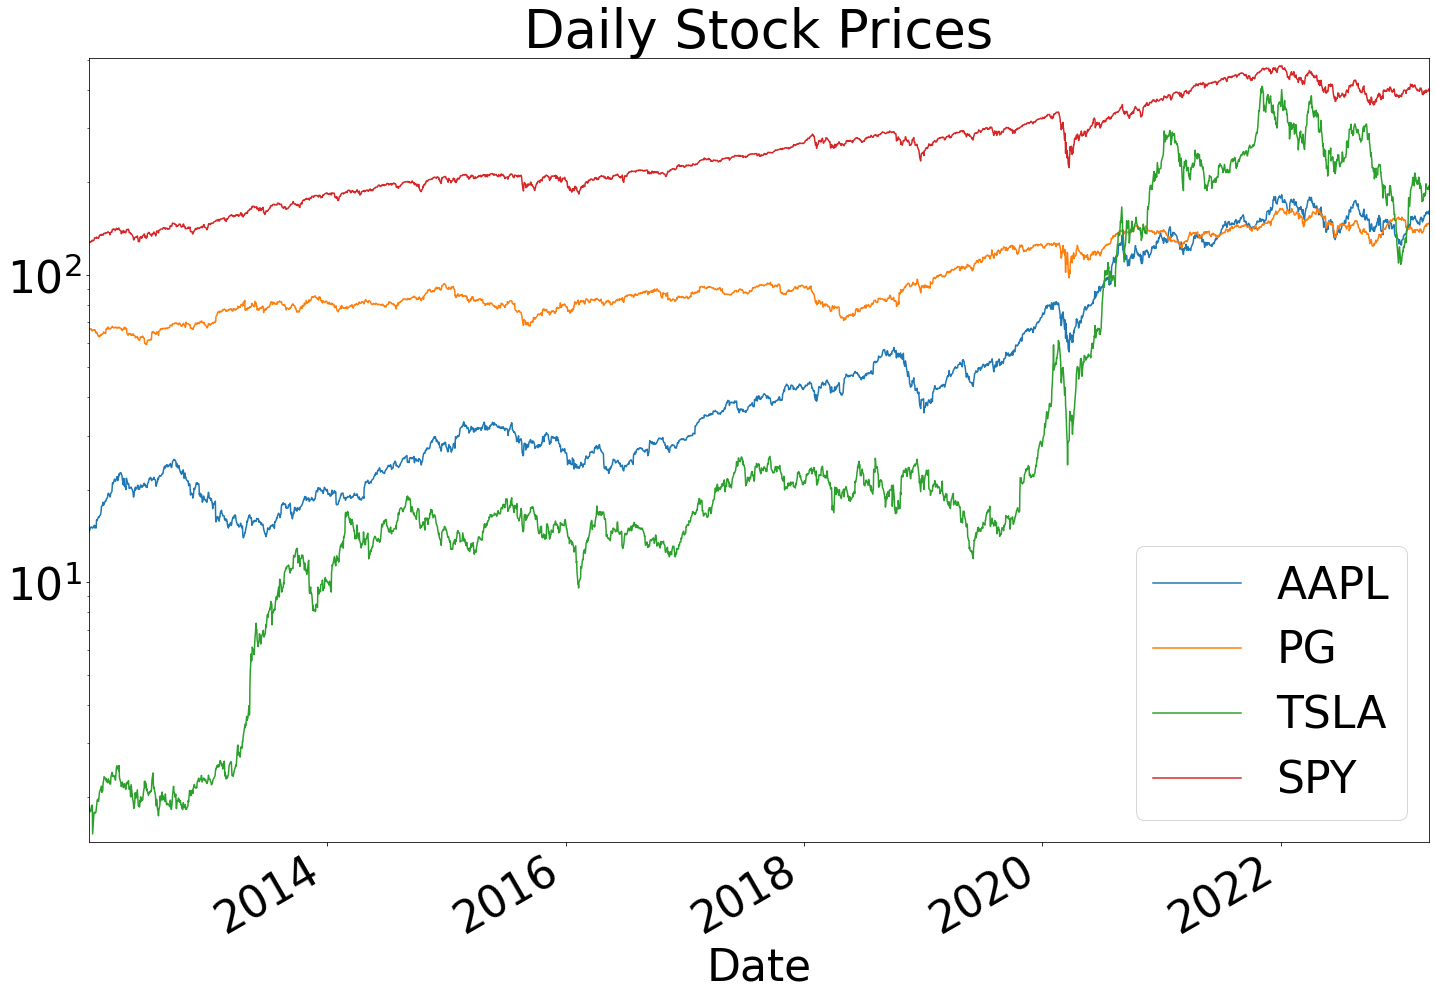

In [20]:
fig,ax=plt.subplots(figsize=(24,16))
cls_data.plot.line(ax=ax,legend=True)
ax.set_title("Daily Stock Prices")
ax.set_yscale('log')

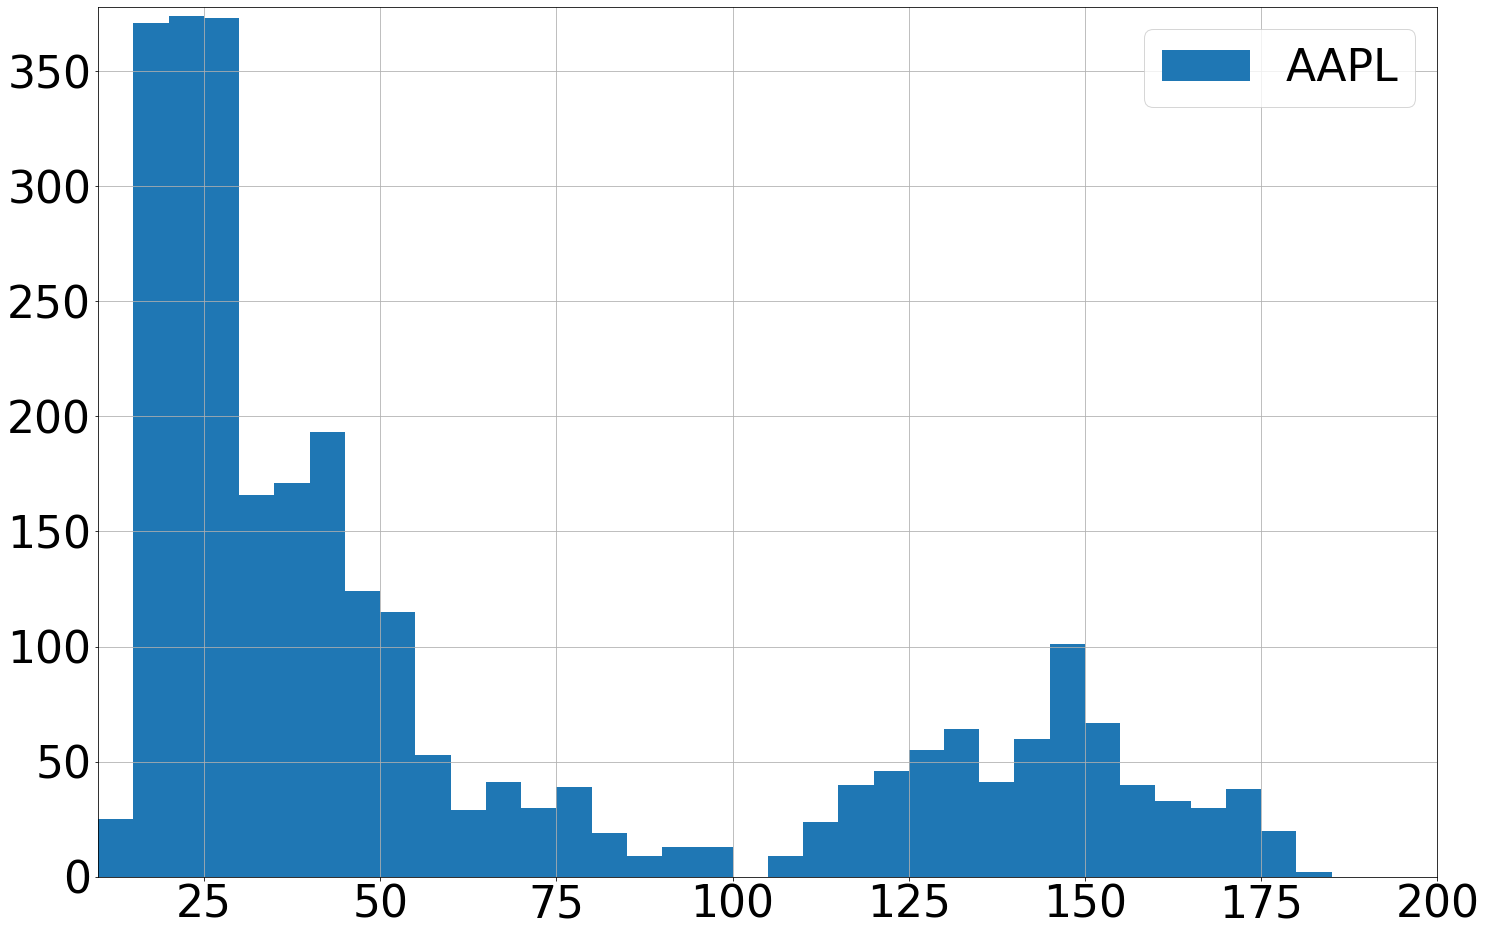

In [21]:
fig, ax = plt.subplots(figsize = (24, 16))
cls_data["AAPL"].hist(bins = [i for i in range(10,201,5)], label = "AAPL")
plt.legend()

In [22]:
stock = 'AAPL'
log_data=np.log(cls_data)

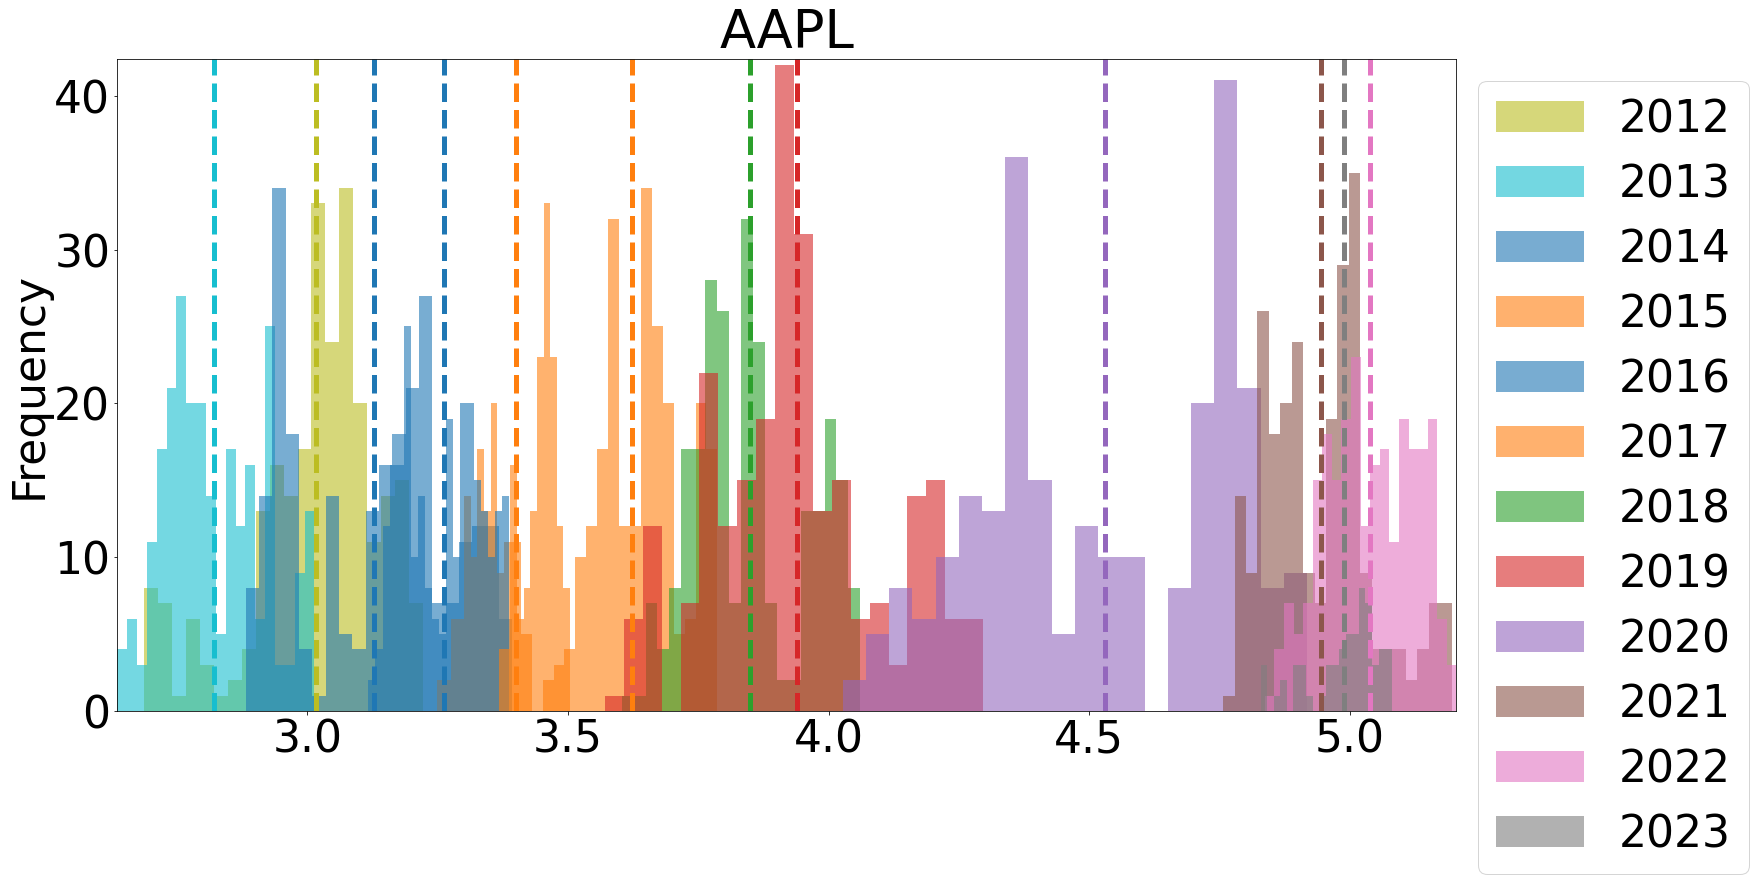

In [23]:
def yr_dist(data,stock,figsize=(24,12), density = False):
    yrs = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize=figsize)
    for year in yrs:
        color = 'C' + str(year % 12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color=color,
                           alpha = .6,
                           label = year,
                           bins = 20,
                           ax=ax)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = '--')
        ax.set_title(stock)
        ax.legend(bbox_to_anchor = (1,1))
        
yr_dist(log_data,stock, density=False)

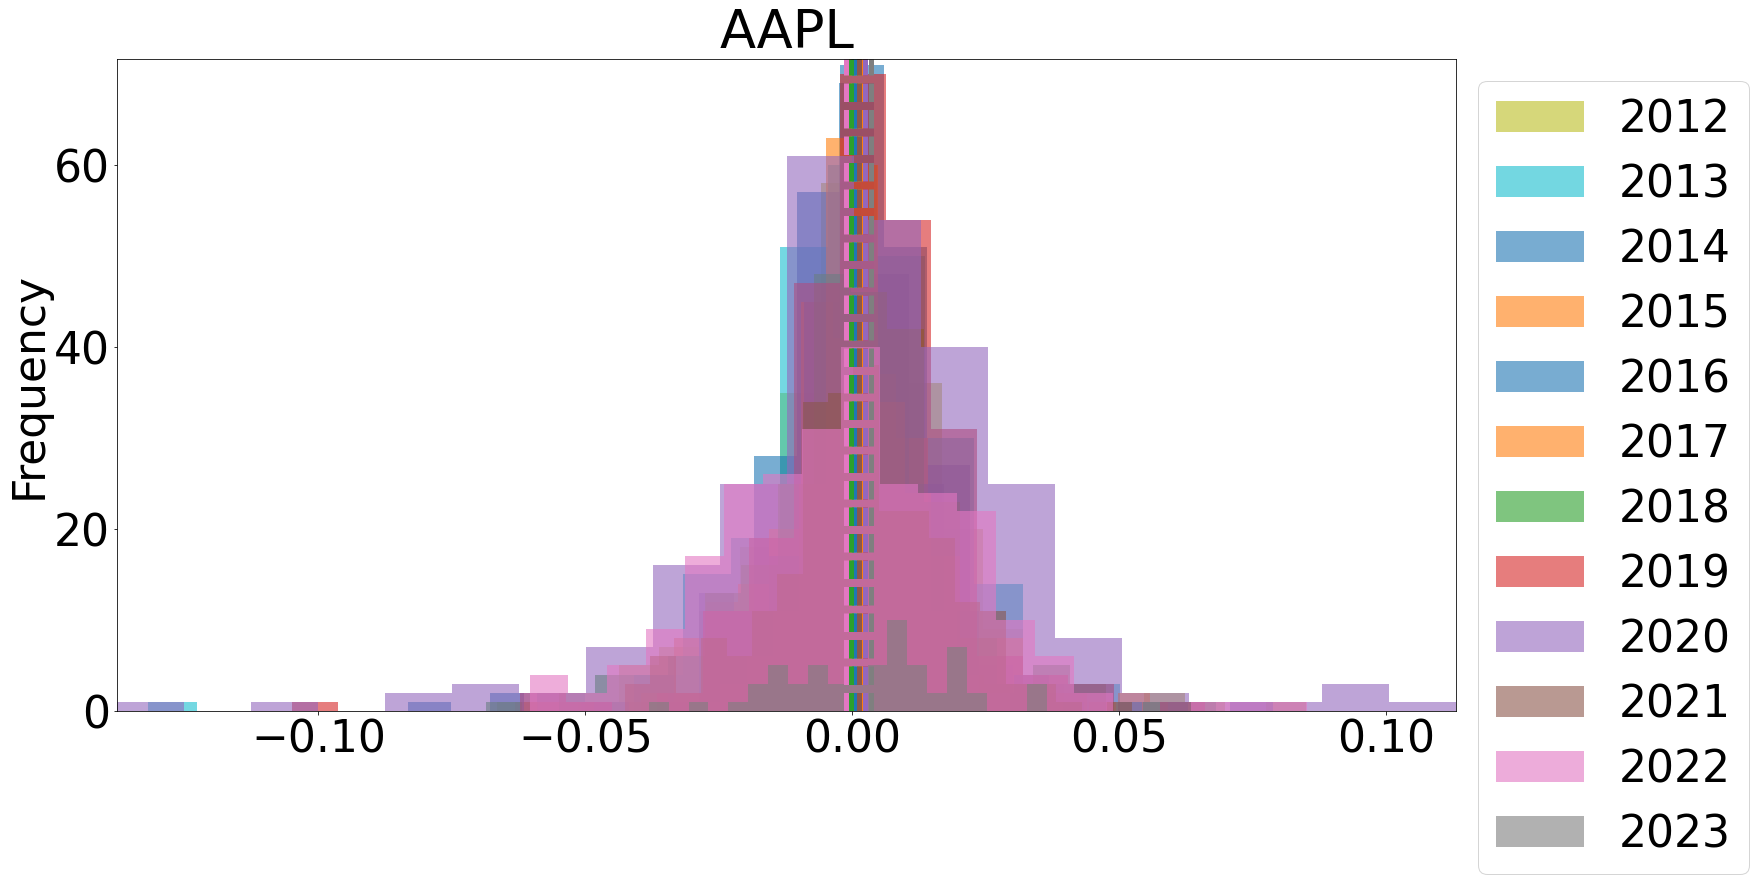

In [24]:
price_chg_data = log_data.diff()
yr_dist(price_chg_data,stock, density=False)

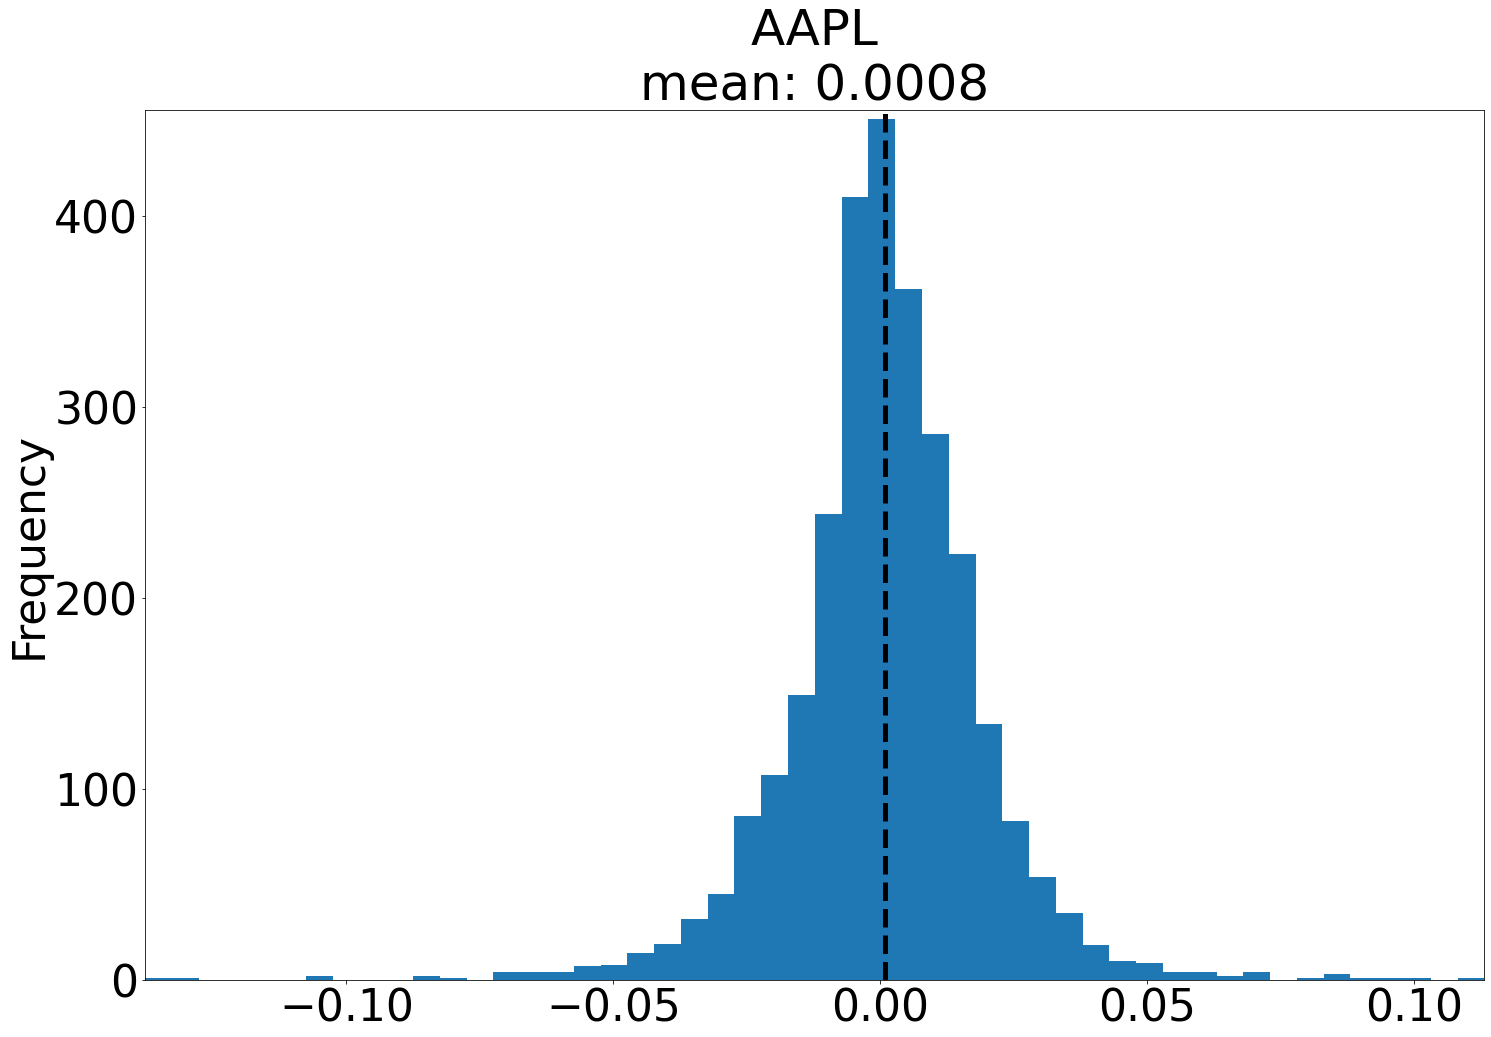

In [25]:
fig, ax = plt.subplots(figsize=(24,16))
stock = "AAPL"
price_chg_mean = round(price_chg_data[stock].mean(), 4)
price_chg_data[stock].dropna().plot.hist(bins=50)
ax.set_title(stock + '\nmean: ' + str(price_chg_mean) ,fontsize=50)

# have artist draw vertical line using mean
ax.axvline(price_chg_mean, color = 'k', linewidth=5,
           ls = "--")

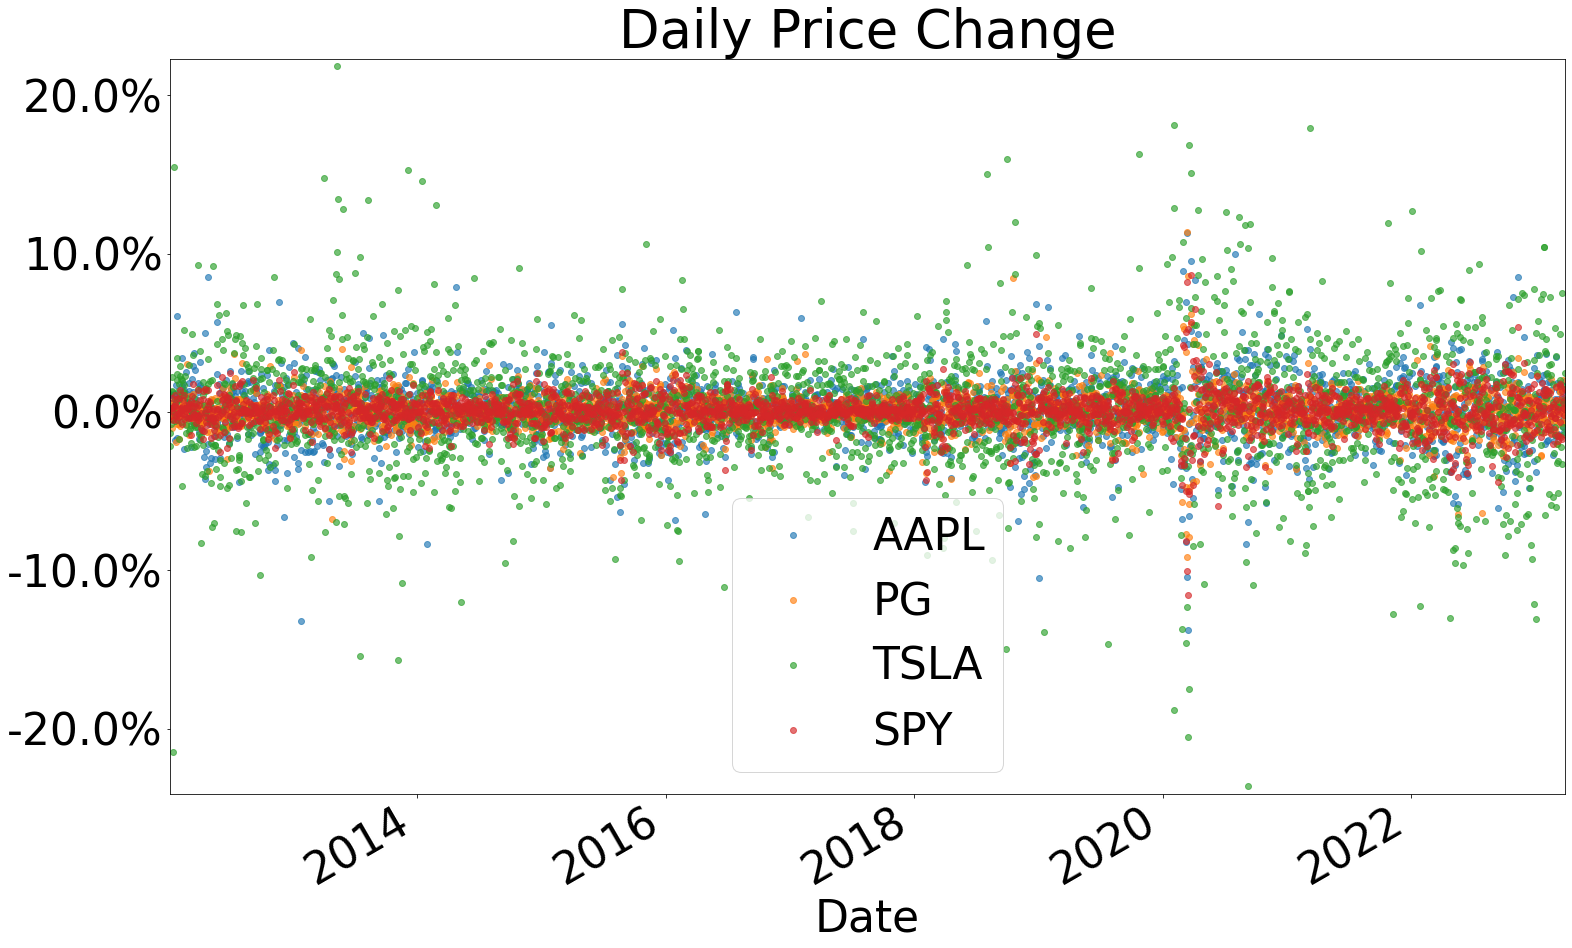

In [26]:
# Lets make a pretty scatter

fig, ax = plt.subplots(figsize=(25,15))
for key in price_chg_data.keys():
    price_chg_data[key].plot.line(marker = ".", 
                                  markersize = '12',
                                  alpha = .65,
                                  ls = " ",
                                  ax = ax)
ax.set_title("Daily Price Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(round(y * 100, 1)) + "%" for y in y_vals])
plt.legend()

# This import is not working for whatever reason I tried troubleshooting for 15 minutes. It works for whatever reason in prior inclass projects. I'll just copy & paste the functions in here

In [27]:
import stats as stat

In [28]:
from stat import *

In [29]:
import pandas as pd

def total(lst):
    total_ = 0
    n = len(lst)
    for i in range(n):
        total_ += lst[i]
    return total_

def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    
    return mean_

def median(lst):
    n = len(lst)
    lst = sorted(lst)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(lst[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(lst):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in lst:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in lst:
        # add on to the count of the value for each occurrence in lst
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(lst, sample = True):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    DoF = n - 1
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in lst:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / DoF
    
    return variance_

def SD(lst, sample = True):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    
    return SD_

def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
    
    return se

def covariance(lst1, lst2, sample = False):
    # determine the mean of each list
    mean1 = mean(lst1)
    mean2 = mean(lst2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(lst1)
    n2 = len(lst2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n):
            cov += (lst1[i] - mean1) * (lst2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)

def correlation(lst1, lst2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(lst1, lst2)
    SD1 = SD(lst1)
    SD2 = SD(lst2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(lst, sample = False):
    mean_ = mean(lst)
    SD_ = SD(lst, sample)
    skew = 0
    n = len(lst)
    for val in lst:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ ** 3) if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
        
    return skew

def kurtosis(lst, sample = False):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if  sample == False else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [30]:
stats_df = gather_statistics(price_chg_data)

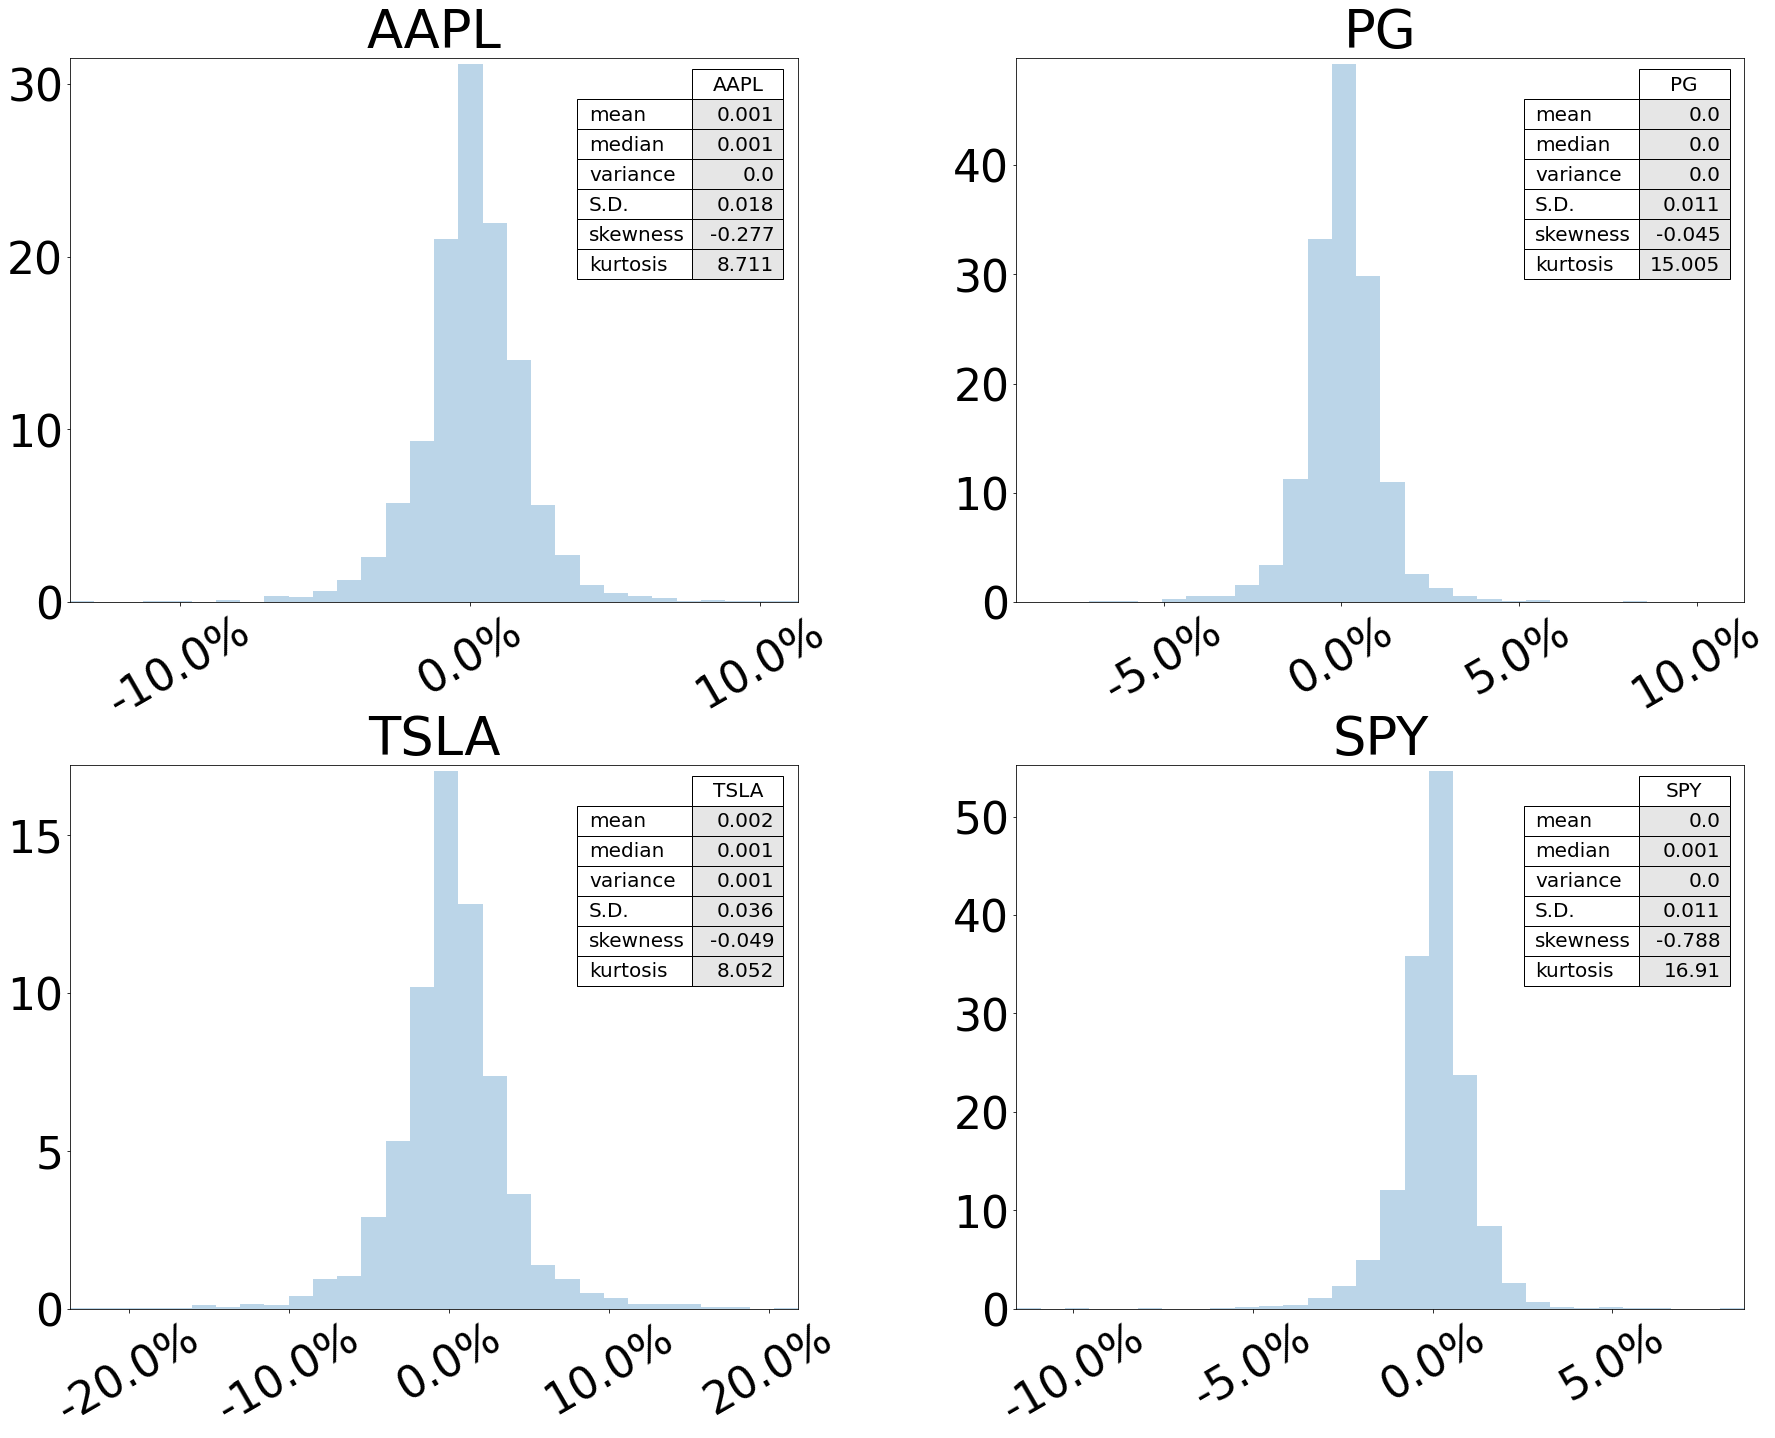

In [31]:
from pandas.plotting import table

fig, axs = plt.subplots(2, 2, figsize=(30,23))
price_chg_data.hist(bins=30,
                   alpha=.3,label=price_chg_data.keys(),ax=axs,density=True)

# adj xtick labels to a multiplot using a for log to access sublists
for sublist in axs:
# axs is a list of list. Each sublist contains axes. Select them as ax.
    for ax in sublist:
        x_vals = ax.get_xticks()
        ax.set_xticklabels([str(round(x*100,10)) + "%" for x in x_vals], rotation=30)
        stock = ax.get_title()
        hist_data = stats_df[stock]
        stats = table(ax,hist_data, colWidths = [.1],
                     cellColours = [[(.9,.9,.9)]]* 6,
                     loc = 'upper right')
        stats.scale(1.25,2.5)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        ax.grid(False)

In [32]:
# measure data in terms of std deviations
price_chg_data.div(price_chg_data.std())

AAPL        PG      TSLA       SPY
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.292739 -0.039599 -0.369898  0.145193
2012-01-05  0.603034 -0.370475 -0.600165  0.246309
2012-01-06  0.568008 -0.212391 -0.216775 -0.239054
2012-01-09 -0.086704  0.371356  0.350134  0.224591
...              ...       ...       ...       ...
2023-03-23  0.379342 -0.122597  0.155666  0.250091
2023-03-24  0.451766  1.779131 -0.263831  0.605885
2023-03-27 -0.675604 -0.464089  0.204286  0.173051
2023-03-28 -0.217833  0.247417 -0.383536 -0.208167
2023-03-29  1.070385  0.270755  0.682874  1.336745

[2828 rows x 4 columns]

In [33]:
price_chg_data

AAPL        PG      TSLA       SPY
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.005360 -0.000449 -0.013264  0.001567
2012-01-05  0.011041 -0.004201 -0.021522  0.002659
2012-01-06  0.010400 -0.002408 -0.007773 -0.002581
2012-01-09 -0.001587  0.004211  0.012556  0.002424
...              ...       ...       ...       ...
2023-03-23  0.006945 -0.001390  0.005582  0.002700
2023-03-24  0.008271  0.020172 -0.009461  0.006541
2023-03-27 -0.012369 -0.005262  0.007326  0.001868
2023-03-28 -0.003988  0.002805 -0.013753 -0.002247
2023-03-29  0.019597  0.003070  0.024488  0.014430

[2828 rows x 4 columns]

In [34]:
price_chg_data['S&P 500'] = web.get_data_yahoo("^GSPC", start=start, end=end)["Close"]
price_chg_data["S&P 500"] = np.log(price_chg_data["S&P 500"]).diff()

[*********************100%***********************]  1 of 1 completed


In [35]:
price_chg_data

AAPL        PG      TSLA       SPY   S&P 500
Date                                                        
2012-01-03       NaN       NaN       NaN       NaN       NaN
2012-01-04  0.005360 -0.000449 -0.013264  0.001567  0.000188
2012-01-05  0.011041 -0.004201 -0.021522  0.002659  0.002939
2012-01-06  0.010400 -0.002408 -0.007773 -0.002581 -0.002540
2012-01-09 -0.001587  0.004211  0.012556  0.002424  0.002259
...              ...       ...       ...       ...       ...
2023-03-23  0.006945 -0.001390  0.005582  0.002700  0.002980
2023-03-24  0.008271  0.020172 -0.009461  0.006541  0.005624
2023-03-27 -0.012369 -0.005262  0.007326  0.001868  0.001646
2023-03-28 -0.003988  0.002805 -0.013753 -0.002247 -0.001575
2023-03-29  0.019597  0.003070  0.024488  0.014430  0.014137

[2828 rows x 5 columns]

# Calculate volatility 'beta'

In [36]:
for stonk in stocks:
    print(stonk)

AAPL
PG
TSLA
SPY


In [37]:
def calculate_beta(data, stock_key, market_key):
    df = data[[stock_key, market_key]].dropna()
    stock_cov = covariance(df[stock_key], df[market_key], sample = True) 
    stock_var = variance(df[market_key], sample = True)
    beta = stock_cov / stock_var
    
    return beta

betas = {}
for stonk in stocks:
    betas[stonk] = calculate_beta(price_chg_data, stonk, 'S&P 500')
pd.DataFrame(betas,index=["$\\beta$"]).T

$\beta$
AAPL  1.173280
PG    0.582183
TSLA  1.447432
SPY   0.989950

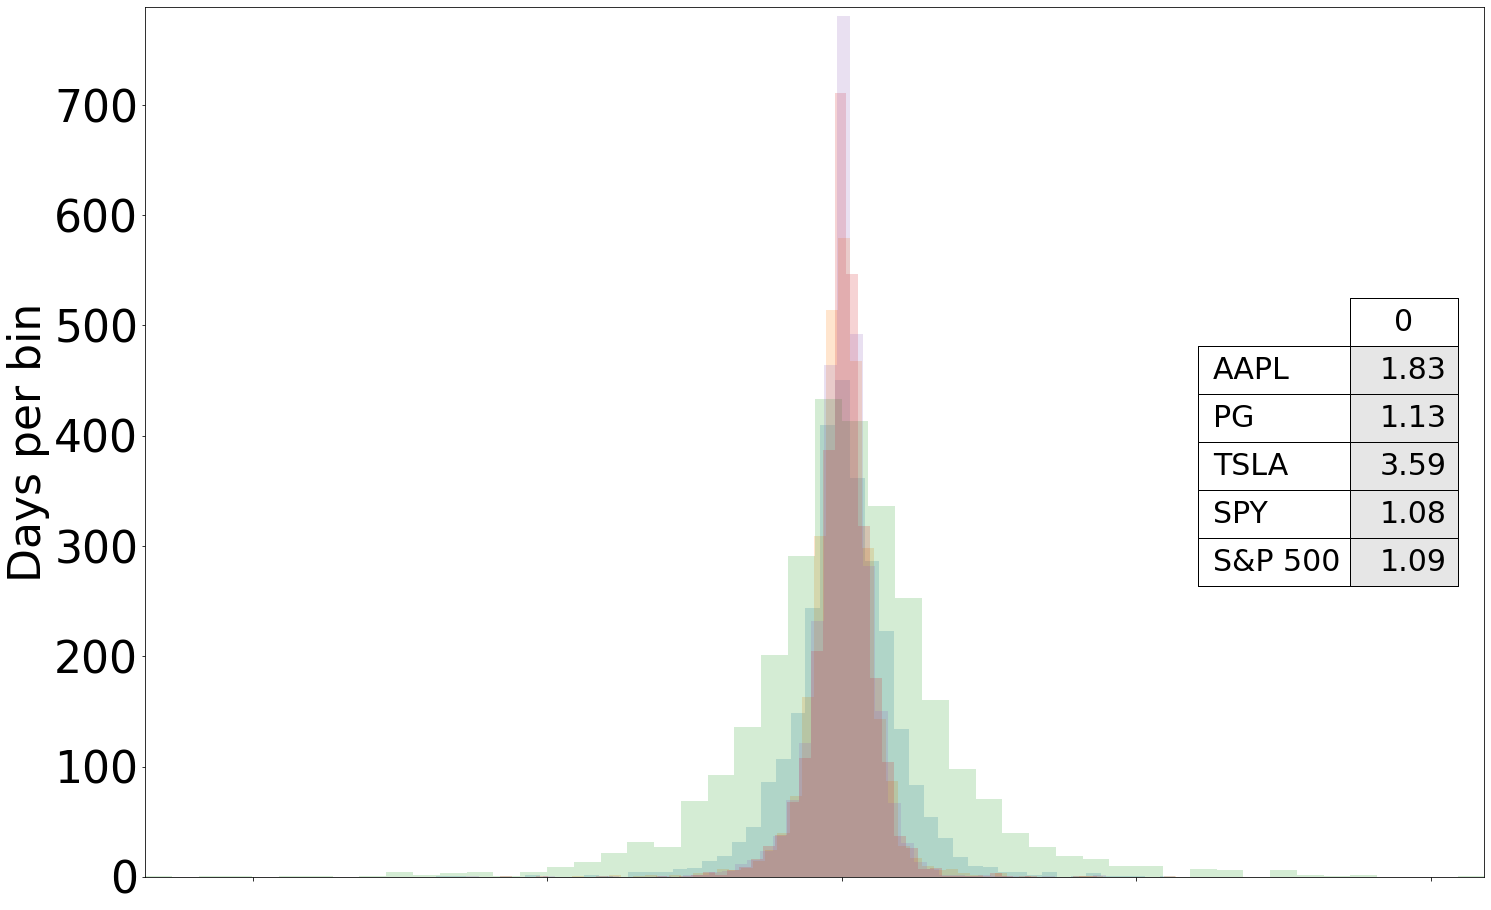

In [38]:
plot_data = price_chg_data.mul(100)
fig, ax = plt.subplots(figsize=(24,16))
for key in price_chg_data:
    plot_data[key].hist(bins=50,
                            alpha=.2,
                            label=key,
                            density=False)
    ax.set_ylabel("Days per bin")
    
    x_vals = ax.get_xticks()
    ax.set_xticklabels([str(int(x) + "%" for x in x_vals)])
    std_df = round(plot_data.std(),2)
    stats = table(ax,
                 std_df,
                 colWidths=[.1],
                 cellColours=[[(.9,.9,.9)]]*5,
                 loc = "center right")
    stats.scale(.8,4)
    stats.auto_set_font_size(False)
    stats.set_fontsize(30)
    ax.grid(False)

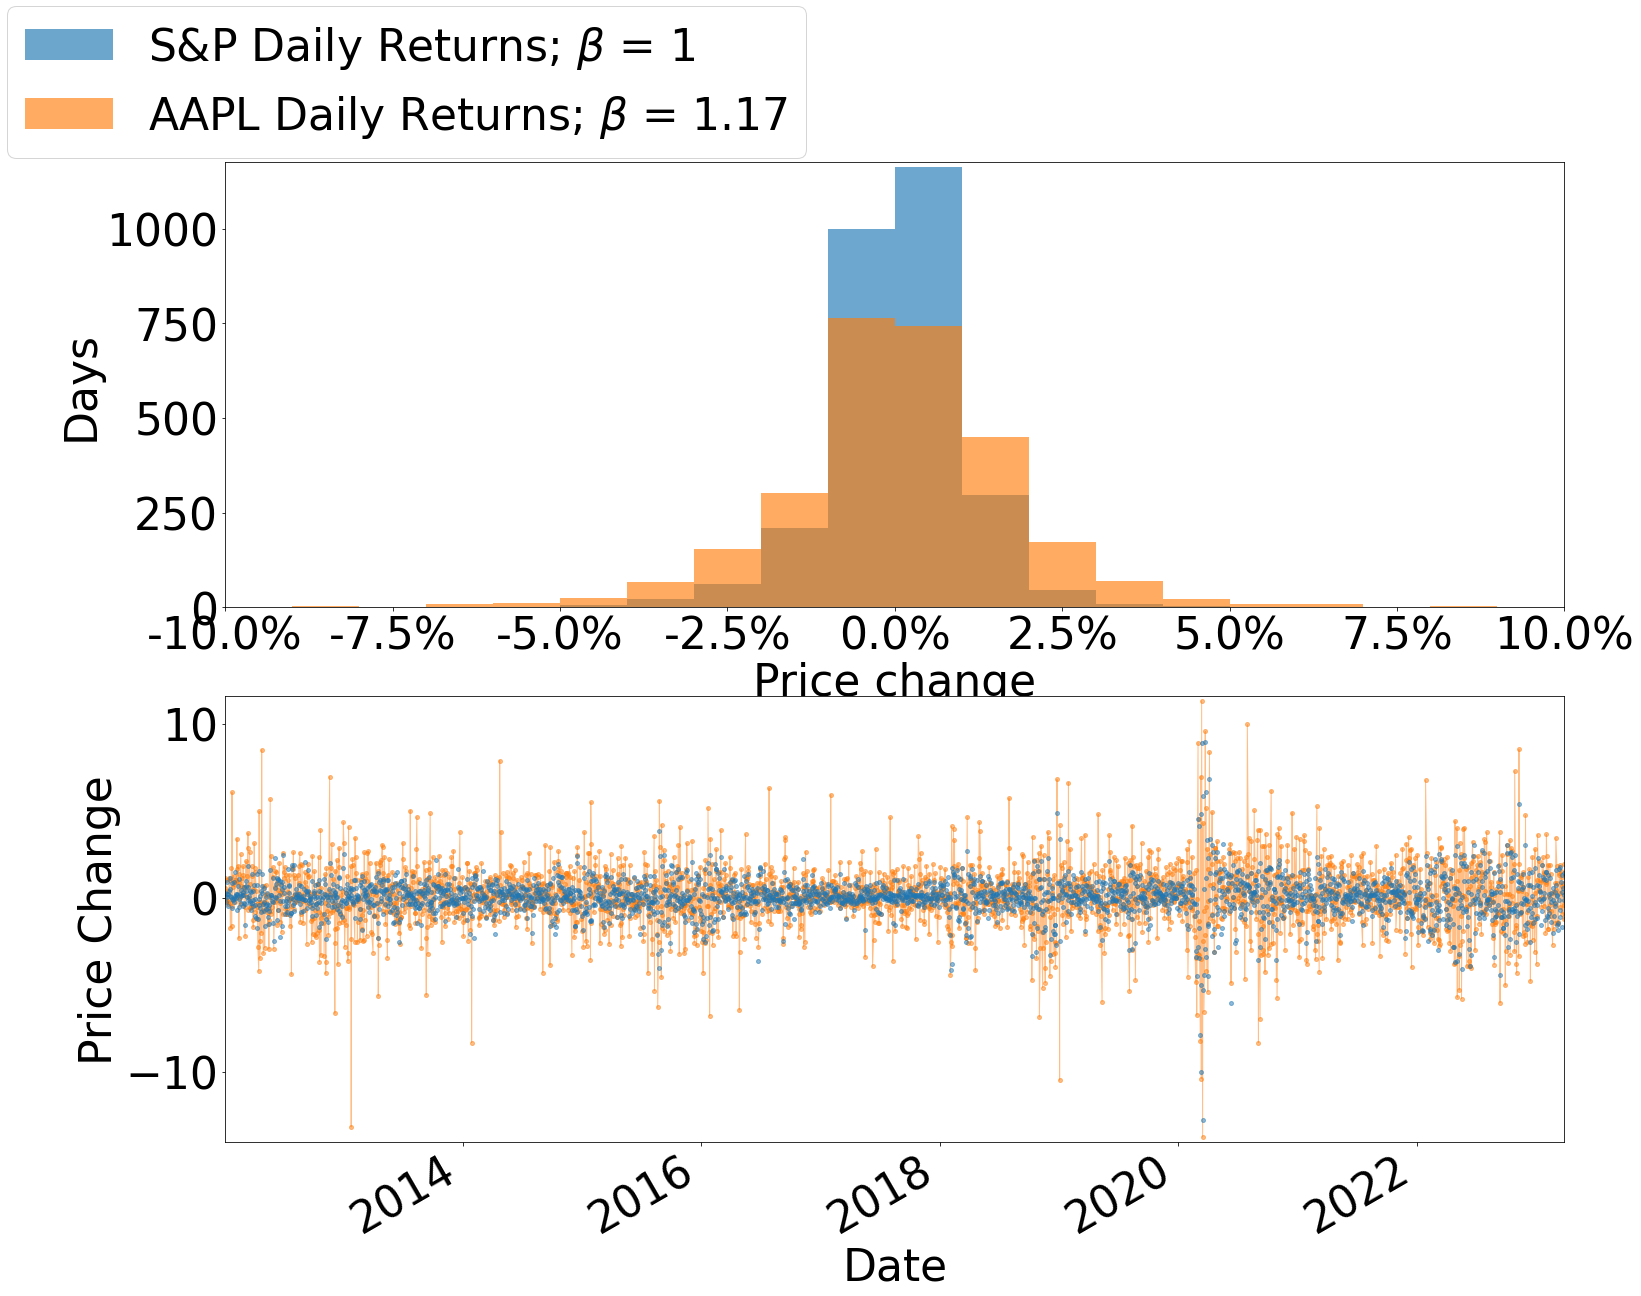

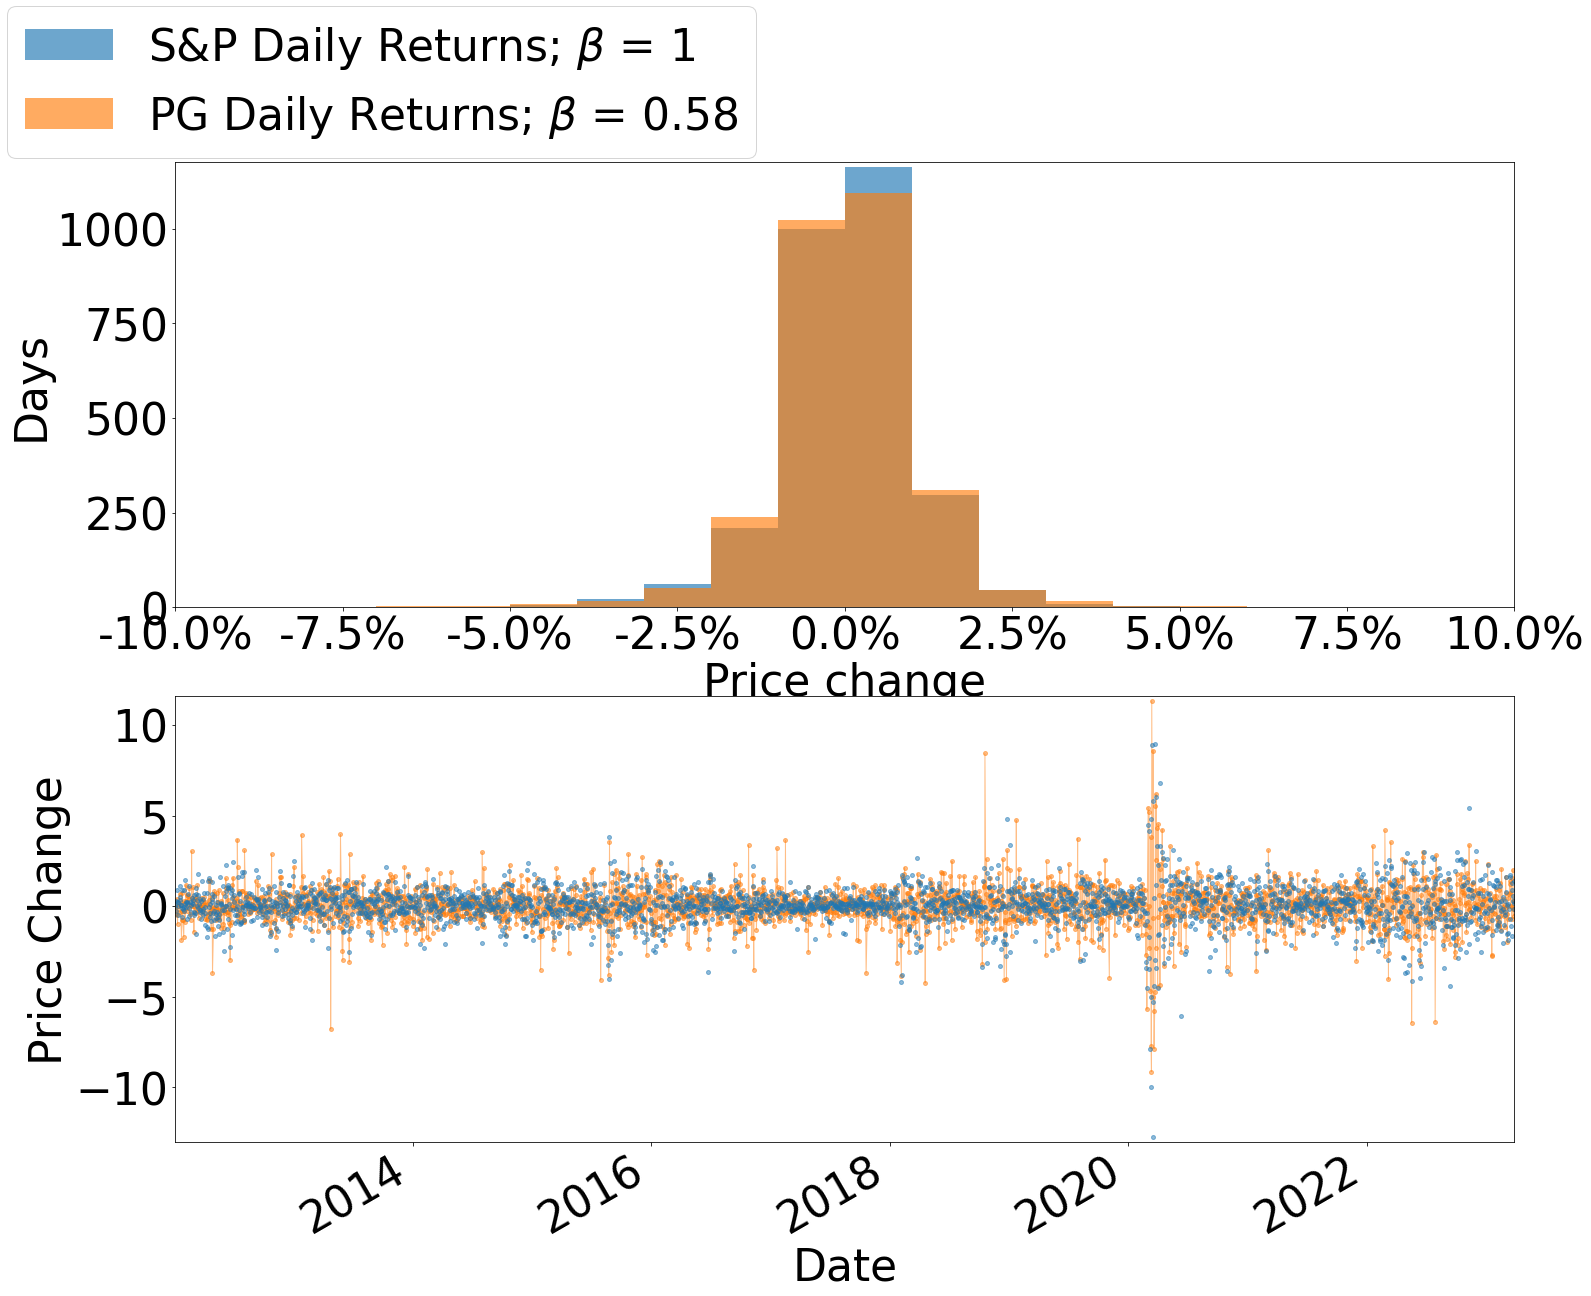

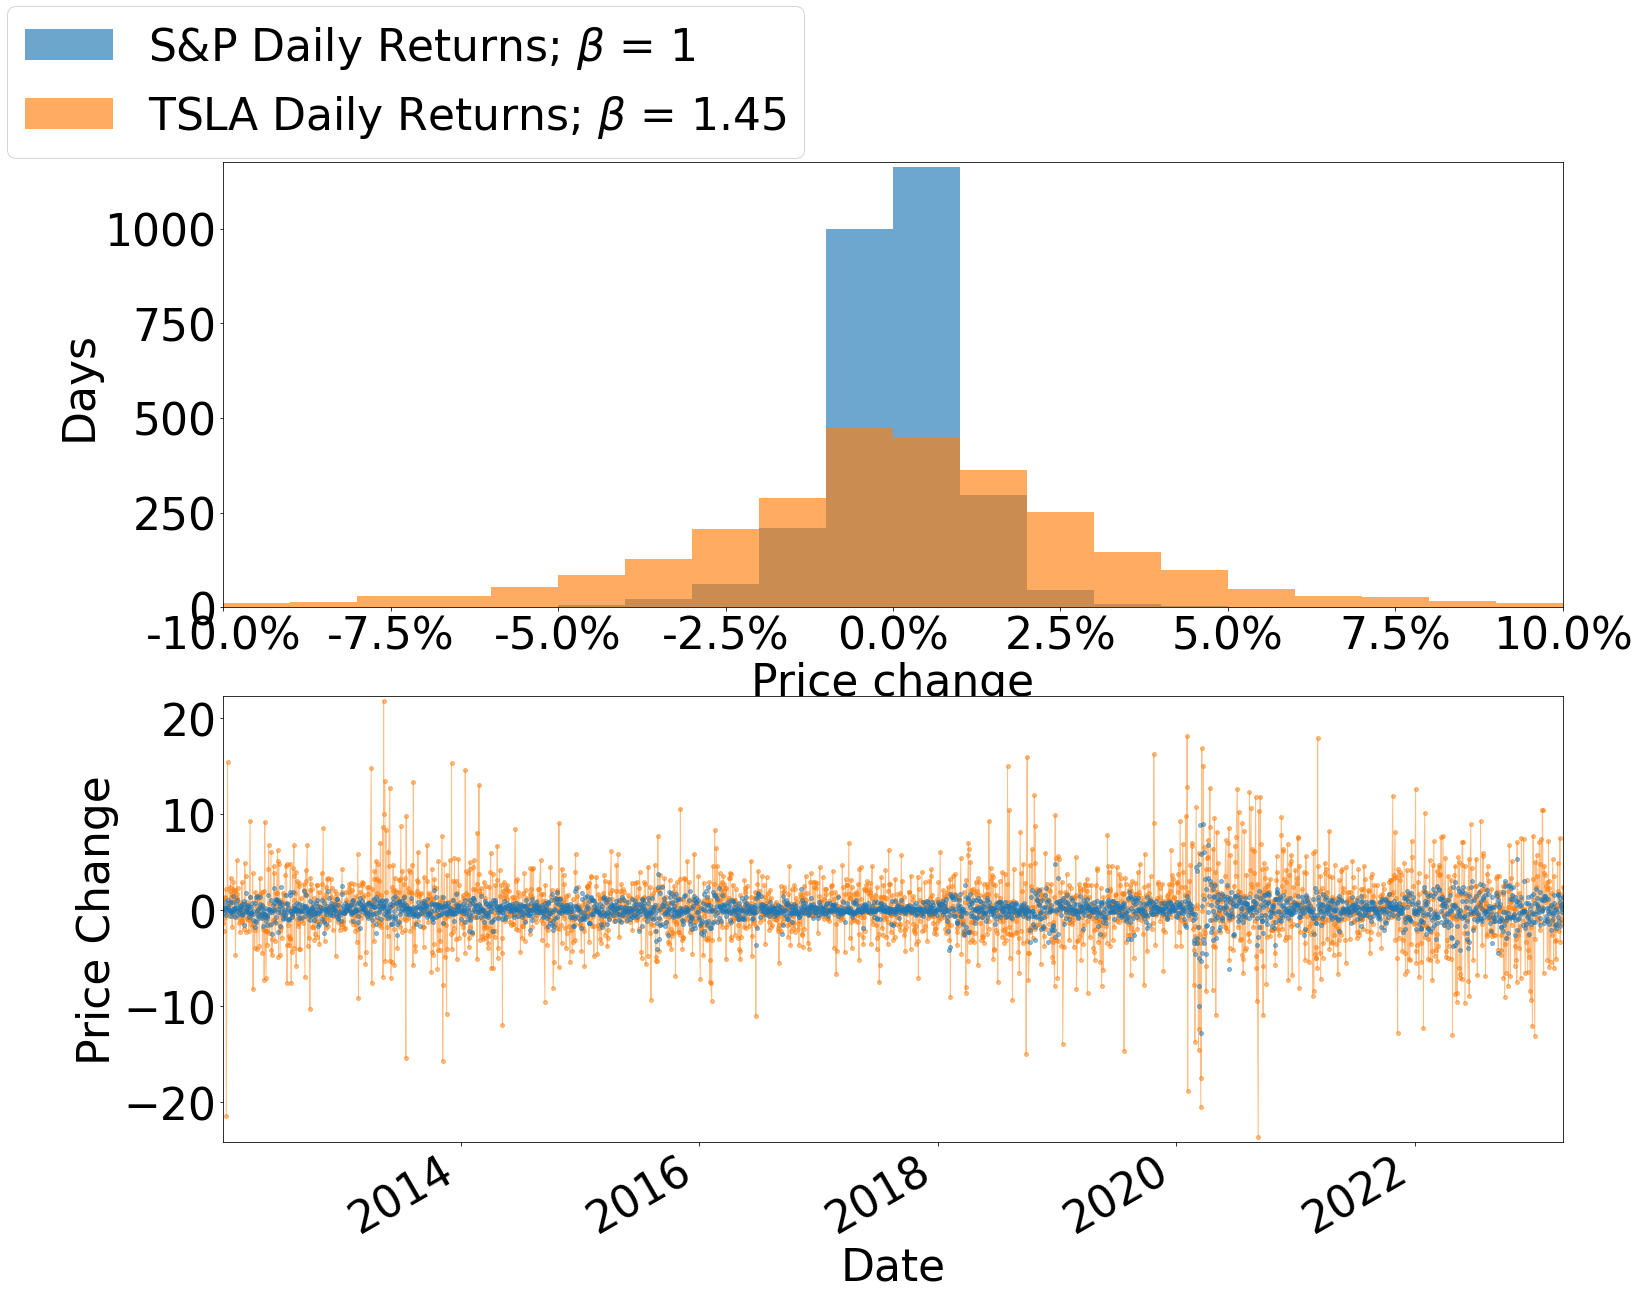

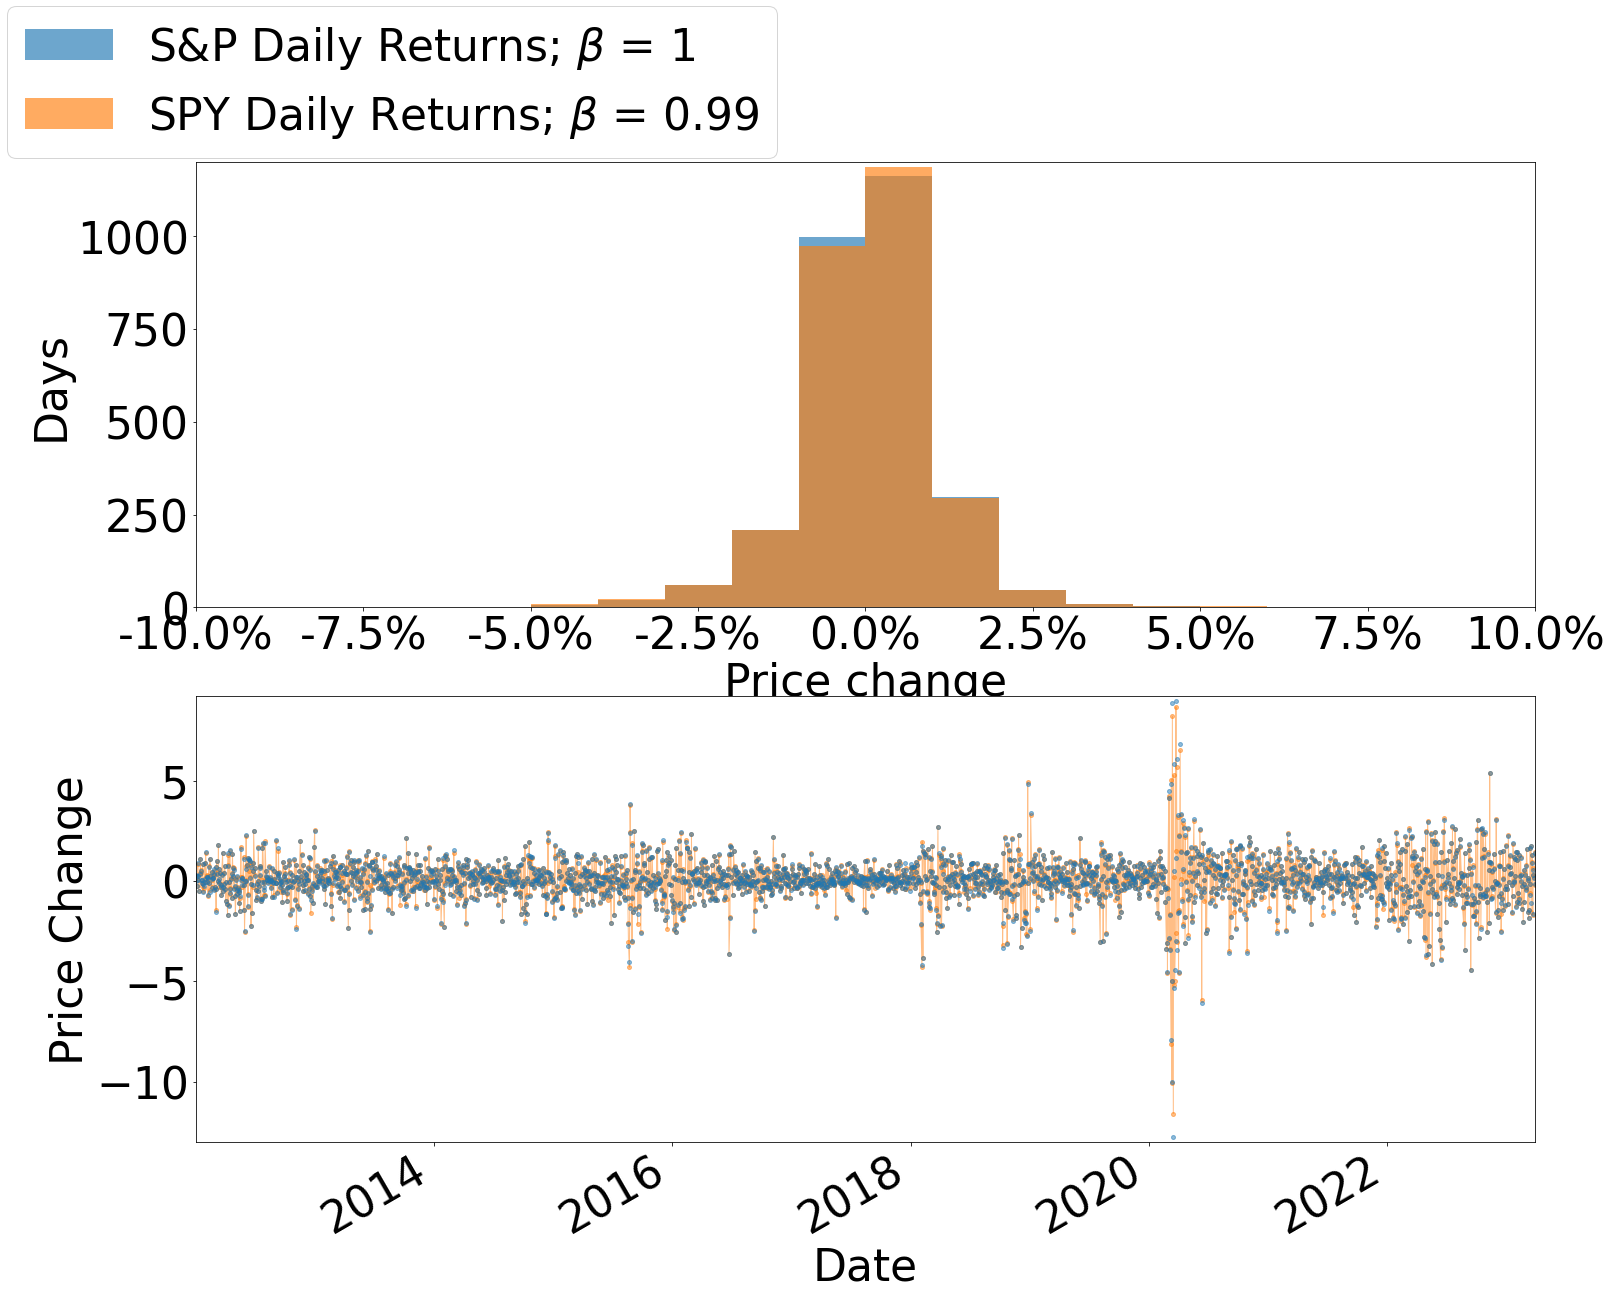

In [39]:
plot_data = price_chg_data.mul(100)
for STONK in stocks:
    fig, ax = plt.subplots(2,1,figsize=(24,20))
    # Plot distr. of data for S&P 500 alongside the stonks in stocks
    plot_data["S&P 500"].hist(
    bins = [x for x in range(-10,11,1)],
    label = "S&P Daily Returns; $\\beta$ = " + str(1),
        ax=ax[0],
        density=False,
        alpha=.65)
    
    plot_data[STONK].hist(
    bins = [x for x in range(-10,11,1)],
    label = STONK + " Daily Returns; $\\beta$ = " + str(betas[STONK].round(2)),
        ax=ax[0],
        density=False,
        alpha=.65)    
    
    ax[0].legend(bbox_to_anchor = (.45,1.4))
    ax[0].set_ylabel("Days")
    ax[0].set_xlabel("Price change")
    ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
#     ax[0].set_yticklabels([str(round(y * 100,2)) + "%" for y in ax[0].get_yticks()])
    ax[0].grid(False)
    # plot a timeseries scatter for s&p alongside each stonk in stocks

    plot_data[STONK].plot(linestyle= "-",
                          linewidth=1,
                                  marker = "o",
                                  alpha = .5,
                                  markersize = 4,
                                  color = "C1",
                                  ax = ax[1])
    plot_data["S&P 500"].plot(linestyle= "",
                                  marker = "o",
                                  alpha = .5,
                                  markersize = 4,
                                  color = "C0",
                                  ax = ax[1])
    ax[1].set_ylabel("Price Change")

### Central Limit Theorem:

If $\bar{X}$ is the mean of a random sample of size $n$ taken
from a population with mean $\mu$ and finite variance $\sigma^2$, then the limiting form of
the distribution of
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$
    </font>
</h3>

 as $\lim_{n \to \infty}$, is the *standard normal distribution* 
 
 The power of the CLT is that this holds no matter the type of distribution we are sampling from. So, for instance, if we took $30$ random samples from a lognormal distribution, the means of the samples would be normally distributed. 
 
 The Z-value tells us: what is the probability that a given sample mean would occur given the sample size and population mean? As n gets larger, the mean is expected to get more accurate if it does follow the population mean $\mu$
 
The gotten _z-score_ tells us how many standard deviations our sample mean $\bar{X}$ is from our population mean $\mu$.
 
 The normal approximation for $\bar{X}$ will generally be good if $n ≥ 30$, provided the population distribution is not terribly skewed. If $n < 30$, the approximation is good only if the population is not too different from a normal distribution and, as stated above, if the population is known to be normal, the sampling distribution of $\bar{X}$ will follow a normal distribution exactly, no matter how small the size of the samples.
 
We also choose the size of the sample, $n$, we want to take from the distributions. $30$ would be sufficient but we will use distributions with $100$ observations. We will draw $1000$ means to observe the mean value theorem visually. 

# English
The central limit theory says that random data follows a normal distribution. With that knowledge we can make statistical inferences because of the 'magic-like' properties of normal distributions.

In [40]:
n = 100
m = 1000

# In each simulation, there is one trial more than the previous simulation
dist_avgs = {"Die Rolls":[],
            "Poisson":[], 
            "Lognormal": []}
# build sample of m means from distr. of length n
for i in range(m):
    dist_avgs["Die Rolls"].append(mean(np.random.randint(1,7,n))) 
    dist_avgs["Poisson"].append(mean(np.random.poisson(1, n)))
    dist_avgs["Lognormal"].append(mean(np.random.lognormal(0, 1, n)))
    
# all columns are a sample of same means
dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

Die Rolls  Poisson  Lognormal
0         3.49     0.99   1.558391
1         3.67     1.10   1.514878
2         3.56     0.94   1.430114
3         3.36     1.14   1.360849
4         3.81     0.99   1.494968
..         ...      ...        ...
995       3.43     0.90   1.710119
996       3.47     0.97   1.320389
997       3.19     1.16   1.579290
998       3.27     1.03   1.438516
999       3.45     1.10   1.915829

[1000 rows x 3 columns]

Text(0.5, 1.0, 'Non-Centered Distributions')

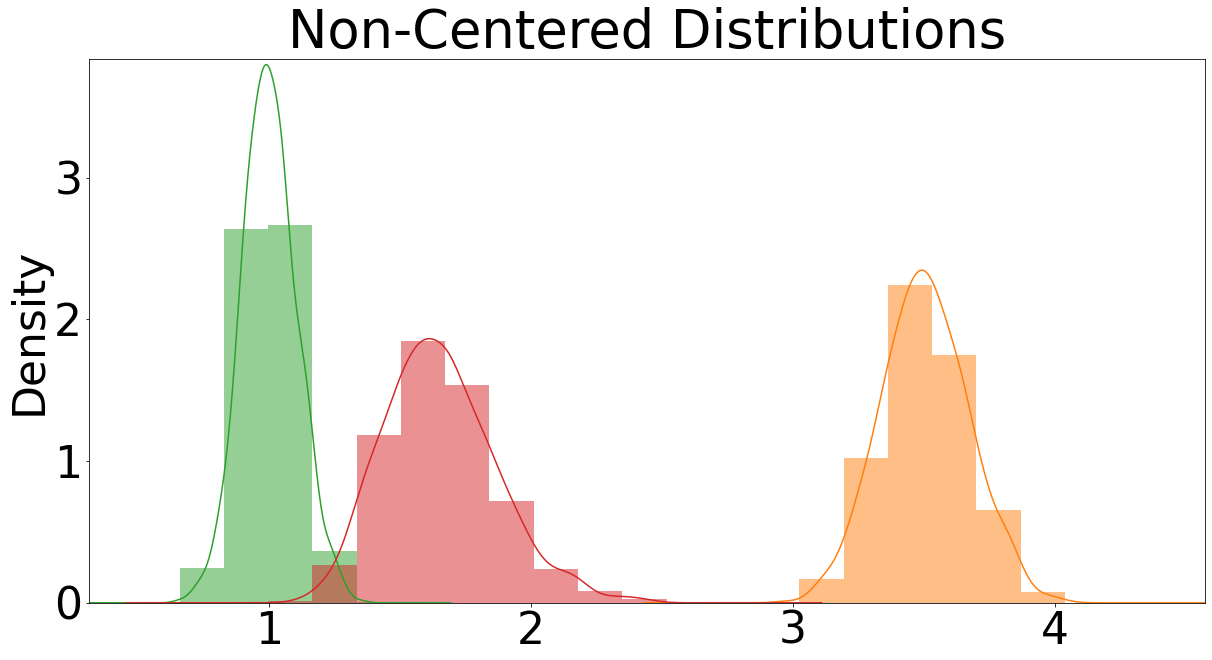

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
dist_avgs.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
dist_avgs.plot.kde(ax=ax, color=["C1", "C2", "C3"], legend=False)
ax.set_title("Non-Centered Distributions")

In [42]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()
for key in dist_avgs:
    means_df[key] = dist_avgs[key].sub(dist_avgs.mean()[key])
    sd_df[key] = means_df[key] / means_df.std()[key]

Taking off the mean from the distribution, the mean is going to be zero from now on. This means it is centering the distribution. After that we normalize the distribution by dividing each obs by the distributions SD.

In [43]:
means_df, sd_df

(     Die Rolls  Poisson  Lognormal
 0     -0.01523 -0.01309  -0.097092
 1      0.16477  0.09691  -0.140605
 2      0.05477 -0.06309  -0.225369
 3     -0.14523  0.13691  -0.294634
 4      0.30477 -0.01309  -0.160515
 ..         ...      ...        ...
 995   -0.07523 -0.10309   0.054636
 996   -0.03523 -0.03309  -0.335094
 997   -0.31523  0.15691  -0.076193
 998   -0.23523  0.02691  -0.216967
 999   -0.05523  0.09691   0.260346
 
 [1000 rows x 3 columns],
      Die Rolls   Poisson  Lognormal
 0    -0.090904 -0.125587  -0.450751
 1     0.983467  0.929765  -0.652763
 2     0.326907 -0.605293  -1.046280
 3    -0.866838  1.313530  -1.367844
 4     1.819089 -0.125587  -0.745192
 ..         ...       ...        ...
 995  -0.449027 -0.989057   0.253649
 996  -0.210278 -0.317469  -1.555678
 997  -1.881522  1.505412  -0.353727
 998  -1.404024  0.258178  -1.007273
 999  -0.329653  0.929765   1.208662
 
 [1000 rows x 3 columns])

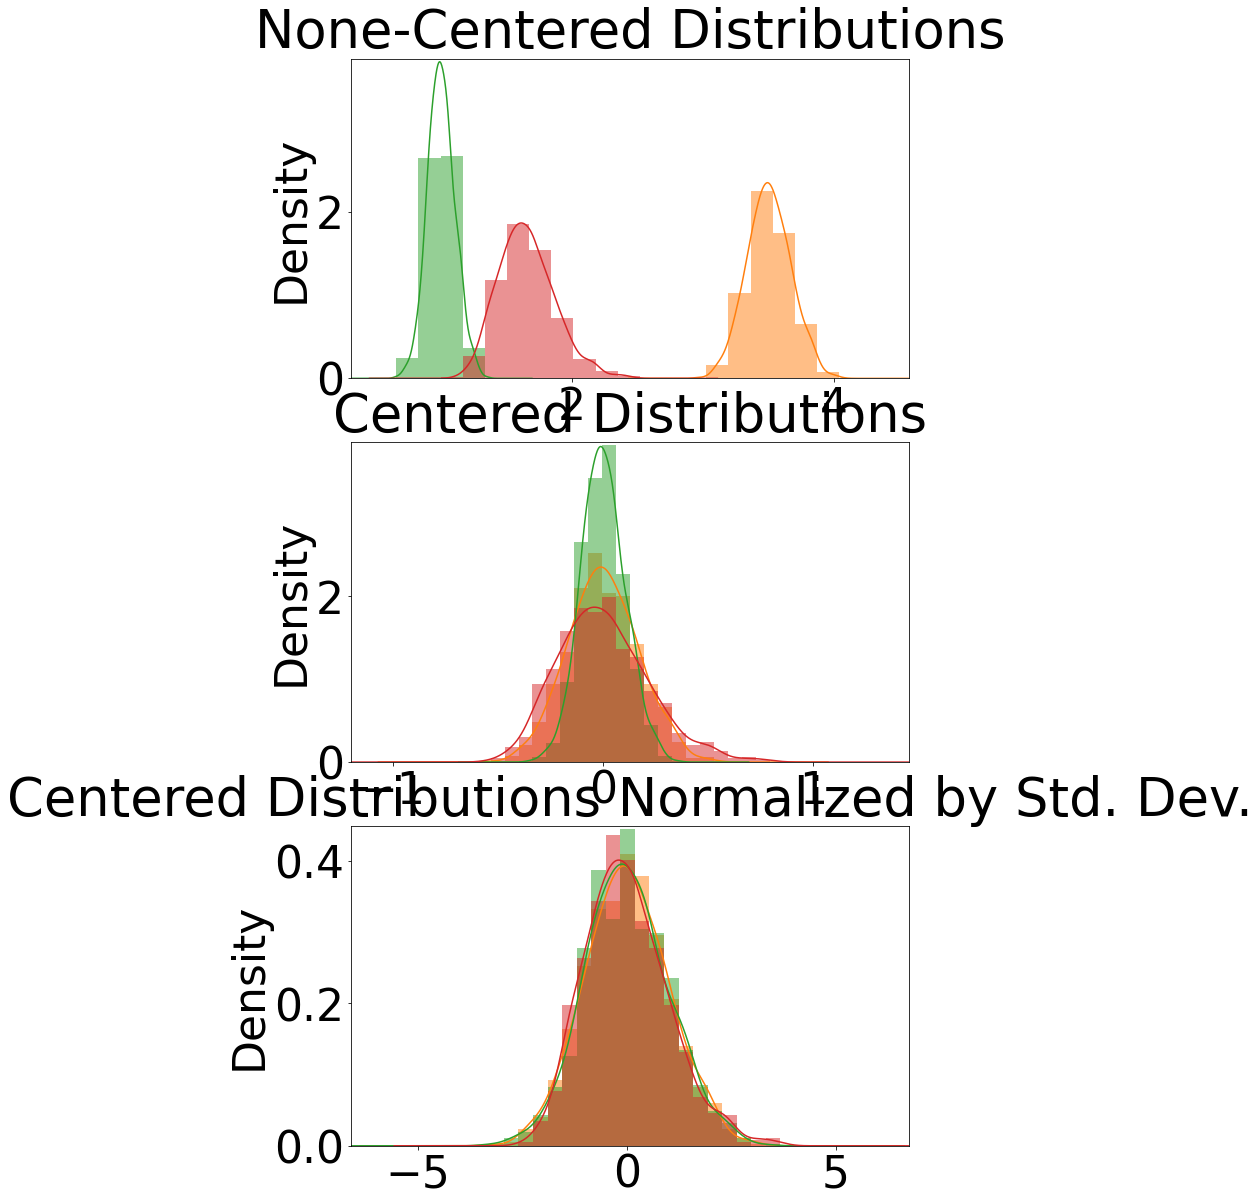

In [44]:
# Save all the dataframes in a single dictionary.
df_dict = {"None-Centered Distributions": dist_avgs,
           "Centered Distributions": means_df,
           "Centered Distributions Normalized by Std. Dev.": sd_df}


# Call dfs through dict
keys = list(df_dict.keys())
fig, axs = plt.subplots(3, figsize=(10,20))


# iterat through the list of keys
for i in range(len(keys)):
    # assign key to index value
    key = keys[i]
    # select ax by index
    ax = axs[i]
    # select df linked to the key
    plot_df = df_dict[key]
     
    # Plot df containing distr. of random sample means
    plot_df.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
    # fit distr. curve on the relevant data
    plot_df.plot.kde(ax=ax, color=["C1", "C2", "C3"], legend=False)
    ax.set_title(key)

# Simulations

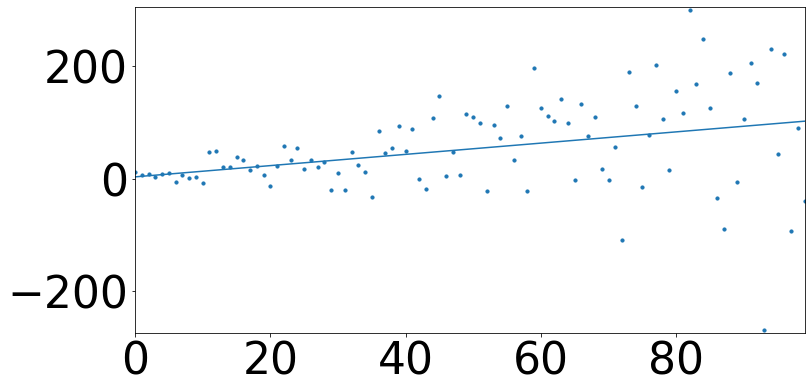

In [51]:
import random
line = np.array([i + 3 for i in range(100)])
points = []
for point in line:
    points.append(random.normalvariate(point, point))
figure = plt.figure(figsize=(12,6))
plt.plot(line)
plt.scatter(np.arange(len(points)), points, s = 10)
plt.show()

In [76]:
mean = 0
sigma = 1
monte_dict = {}
num_sims = 1000
periods = 10
# iterate of num sims

for i in range(num_sims):
    monte_dict[i] = {}
    for period in range(periods):
        # abbreviate dictionary i name
        curr_sim = monte_dict[i]
        if period == 0:
            curr_sim[period]=random.normalvariate(mean,sigma)
        else:
            curr_sim[period]=curr_sim[period-1]+random.normalvariate(mean,sigma)

In [77]:
sim_df = pd.DataFrame(monte_dict)
sim_df

0         1         2         3         4         5         6    \
0 -0.534506 -0.176145 -0.139918  0.794323  1.021681 -0.232849  1.636364   
1 -0.964058  0.958983 -1.076700  2.130949  0.703241 -0.964654  1.935082   
2 -3.450118  1.367346 -0.262981  2.600678  1.317500 -1.343228  0.517519   
3 -3.375110  2.311337  0.290162  3.543791  1.544867 -0.230196  0.016359   
4 -1.980750  1.801952  0.380779  3.268390  2.267771  0.820188 -1.728149   
5 -1.552259  1.477632  1.869538  3.664760  3.321587 -0.605443  0.195032   
6  0.672327  1.626106  2.596987  3.302896  2.294877 -0.337610 -0.403811   
7  0.464427  2.822195  1.409572  3.627388  3.260569 -0.143138  0.091478   
8  0.410952  3.322182  2.219372  1.488992  4.436620  0.072087 -0.363525   
9  0.601895  3.602908  2.705914  2.050163  5.023872 -0.225690 -1.556771   

        7         8         9    ...       990       991       992       993  \
0 -1.570254  1.923621  0.521782  ... -0.846104 -0.942769  0.754771  1.651553   
1 -2.626977  1.440207 -0.471311  ... -2.125081 -0.438426  1.581330  3.410774   
2 -2.595240  2.434775 -0.436811  ... -2.862820 -0.424306  1.845997  3.918491   
3 -1.644029  2.740171 -0.578477  ... -0.455672 -1.545139  2.407870  5.022383   
4 -1.669584  2.504638  0.014655  ...  0.517782 -1.456793  1.890741  4.414049   
5 -3.696792  1.609802 -0.036399  ... -0.566867 -1.146891  2.334788  4.448024   
6 -2.877869  2.957371  0.989060  ... -0.973038 -0.982908  1.157745  4.456811   
7 -3.683308  1.160002 -0.251292  ... -1.712717 -0.464136  0.458993  4.014958   
8 -3.797807  1.916236  0.908810  ... -2.038067 -0.645183 -0.063209  5.631909   
9 -3.714547  2.069181  1.186454  ... -1.753285  0.641426  0.063831  5.384489   

        994       995       996       997       998       999  
0 -0.750221  0.113677  0.542238 -0.693718 -1.443970 -0.356999  
1 -1.184188 -1.095357  0.161255 -1.148059 -1.622632 -1.975618  
2  0.298152 -1.700725 -0.118179 -0.711836 -0.329108 -3.420225  
3  0.401576 -1.098625  1.005661 -0.454446 -1.105727 -3.218574  
4  1.512305 -2.386009 -0.377203 -0.728150 -0.581463 -3.090744  
5  0.971733 -3.497184 -0.071431 -0.594331 -0.364743 -2.983822  
6  2.851574 -3.742476 -2.163166  0.044112 -0.068387 -3.149992  
7  2.884705 -4.291765 -1.667071  0.105980 -1.460243 -2.751049  
8  3.789306 -2.410638 -2.403909 -0.525310 -1.222840 -2.606600  
9  4.594322 -1.859055 -1.998075 -0.627487 -1.962873 -1.260152  

[10 rows x 1000 columns]

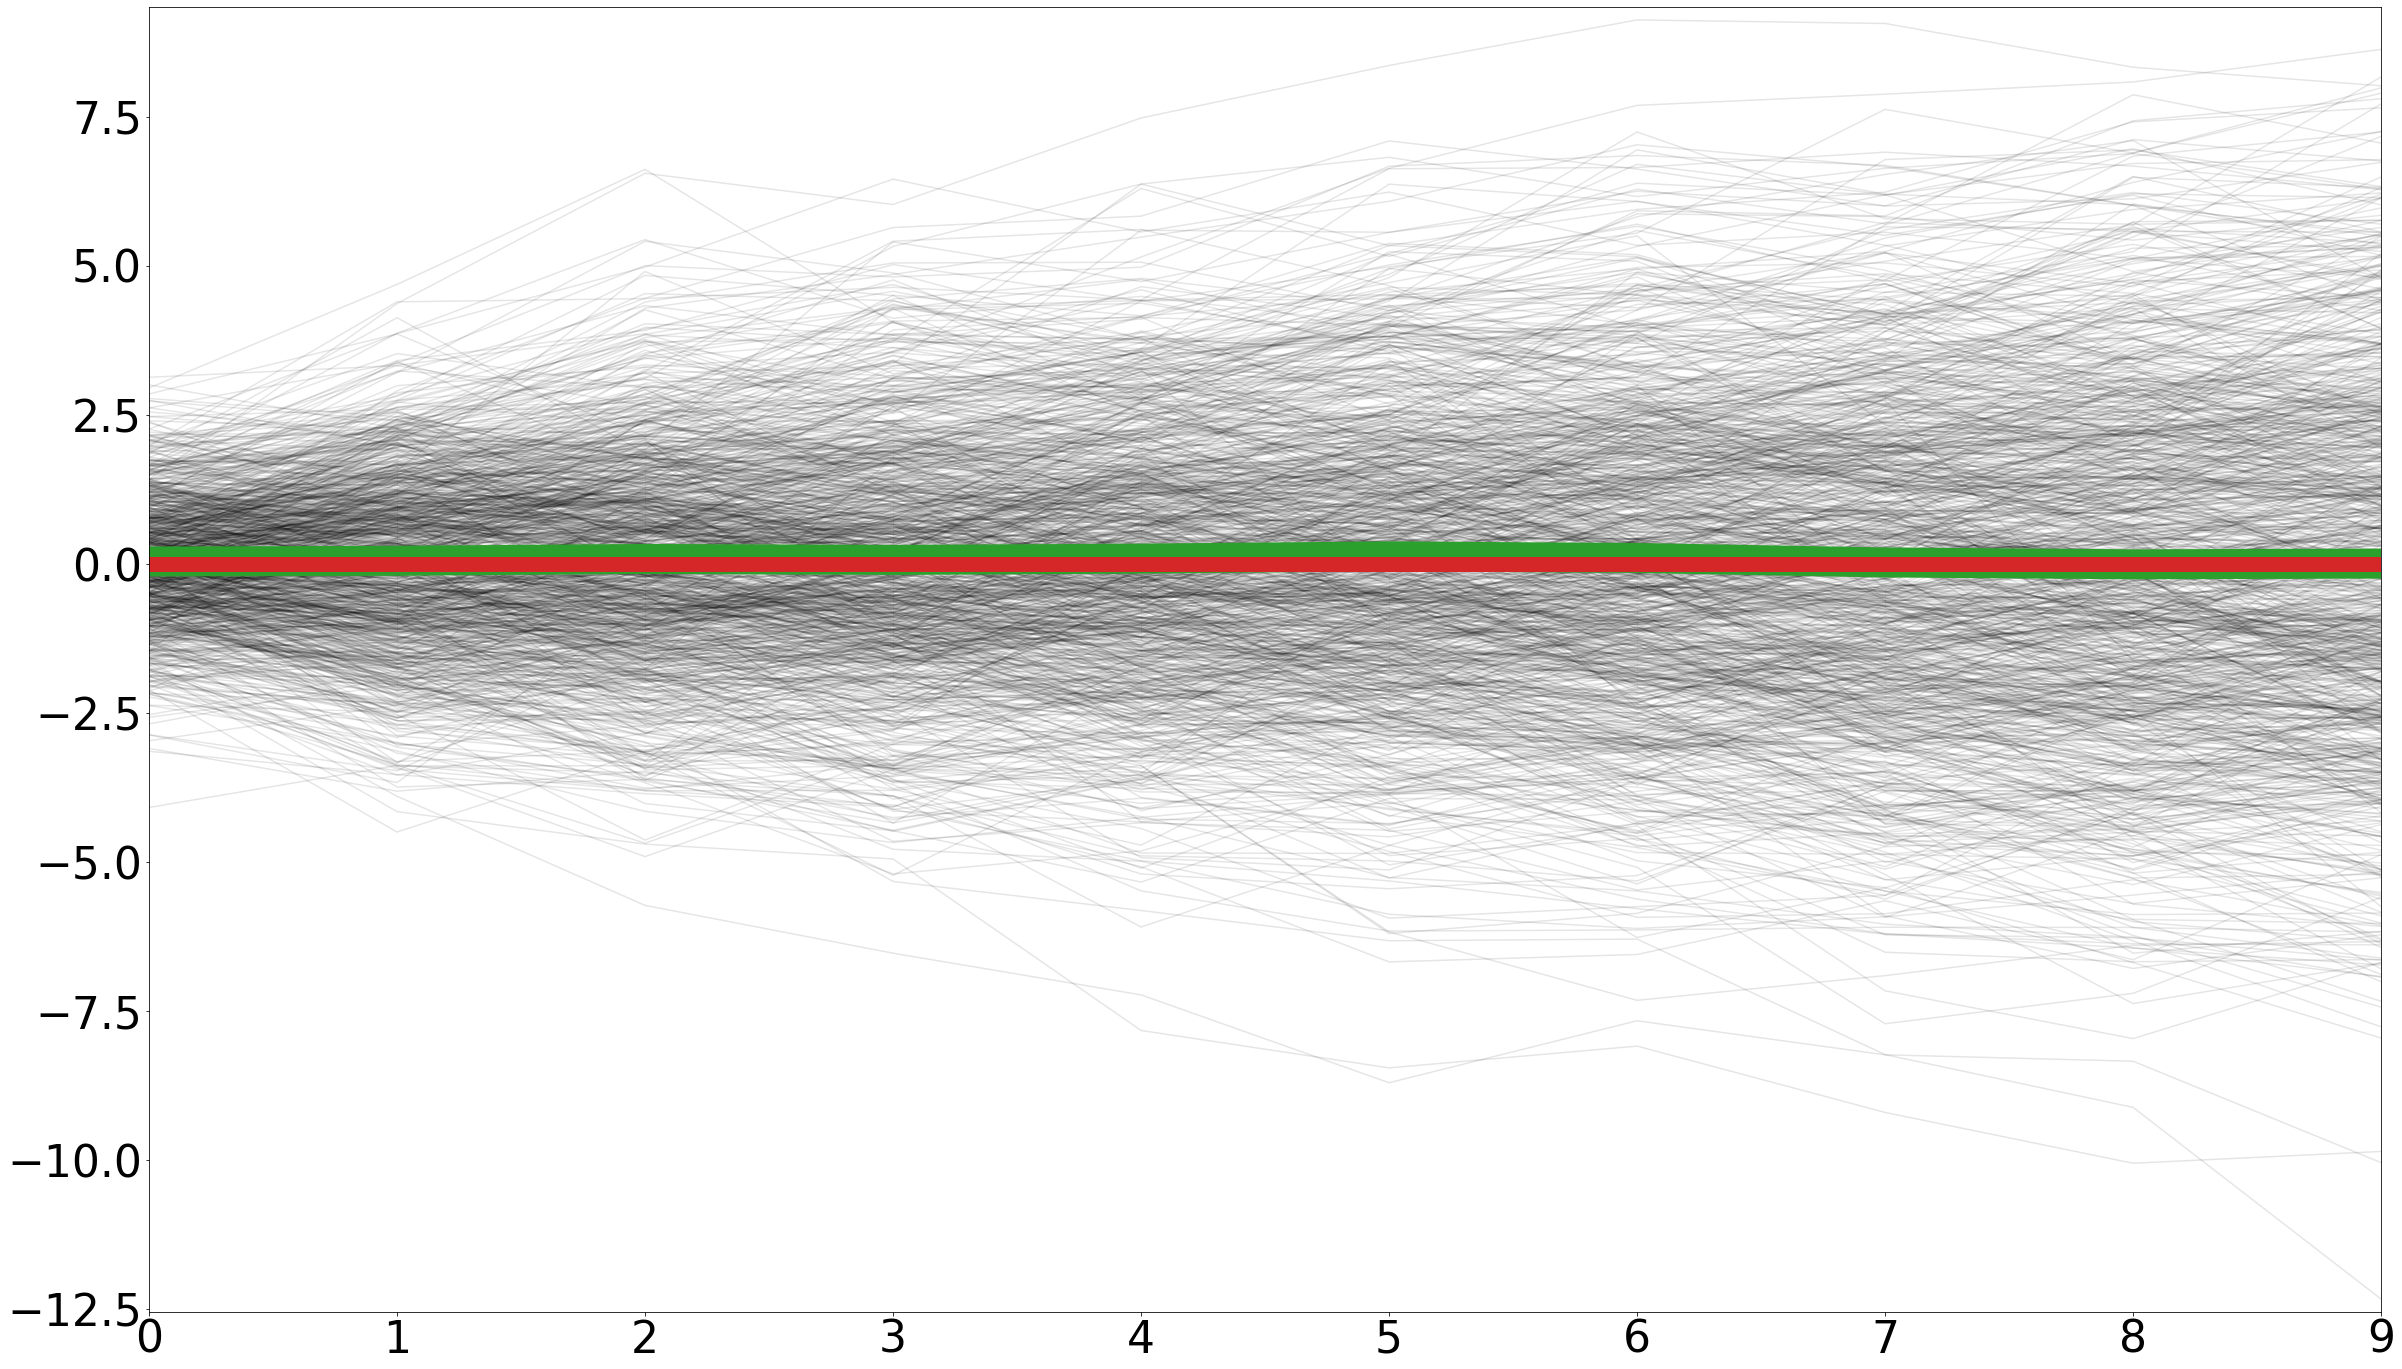

In [90]:
fig,ax=plt.subplots(figsize=(40,24))
sim_df.plot.line(marker = ".", markersize = .1, color = "k", alpha = .1, ax=ax,legend=False)

sim_df.mean(axis=1).plot.line(color="C2",ax=ax, linewidth=30)
ax.axhline(0,linewidth=15, color = "C3")

[Text(0, 0.0, '0.0%'),
 Text(0, 0.02, '2.0%'),
 Text(0, 0.04, '4.0%'),
 Text(0, 0.06, '6.0%'),
 Text(0, 0.08, '8.0%'),
 Text(0, 0.1, '10.0%'),
 Text(0, 0.12, '12.0%'),
 Text(0, 0.14, '14.0%')]

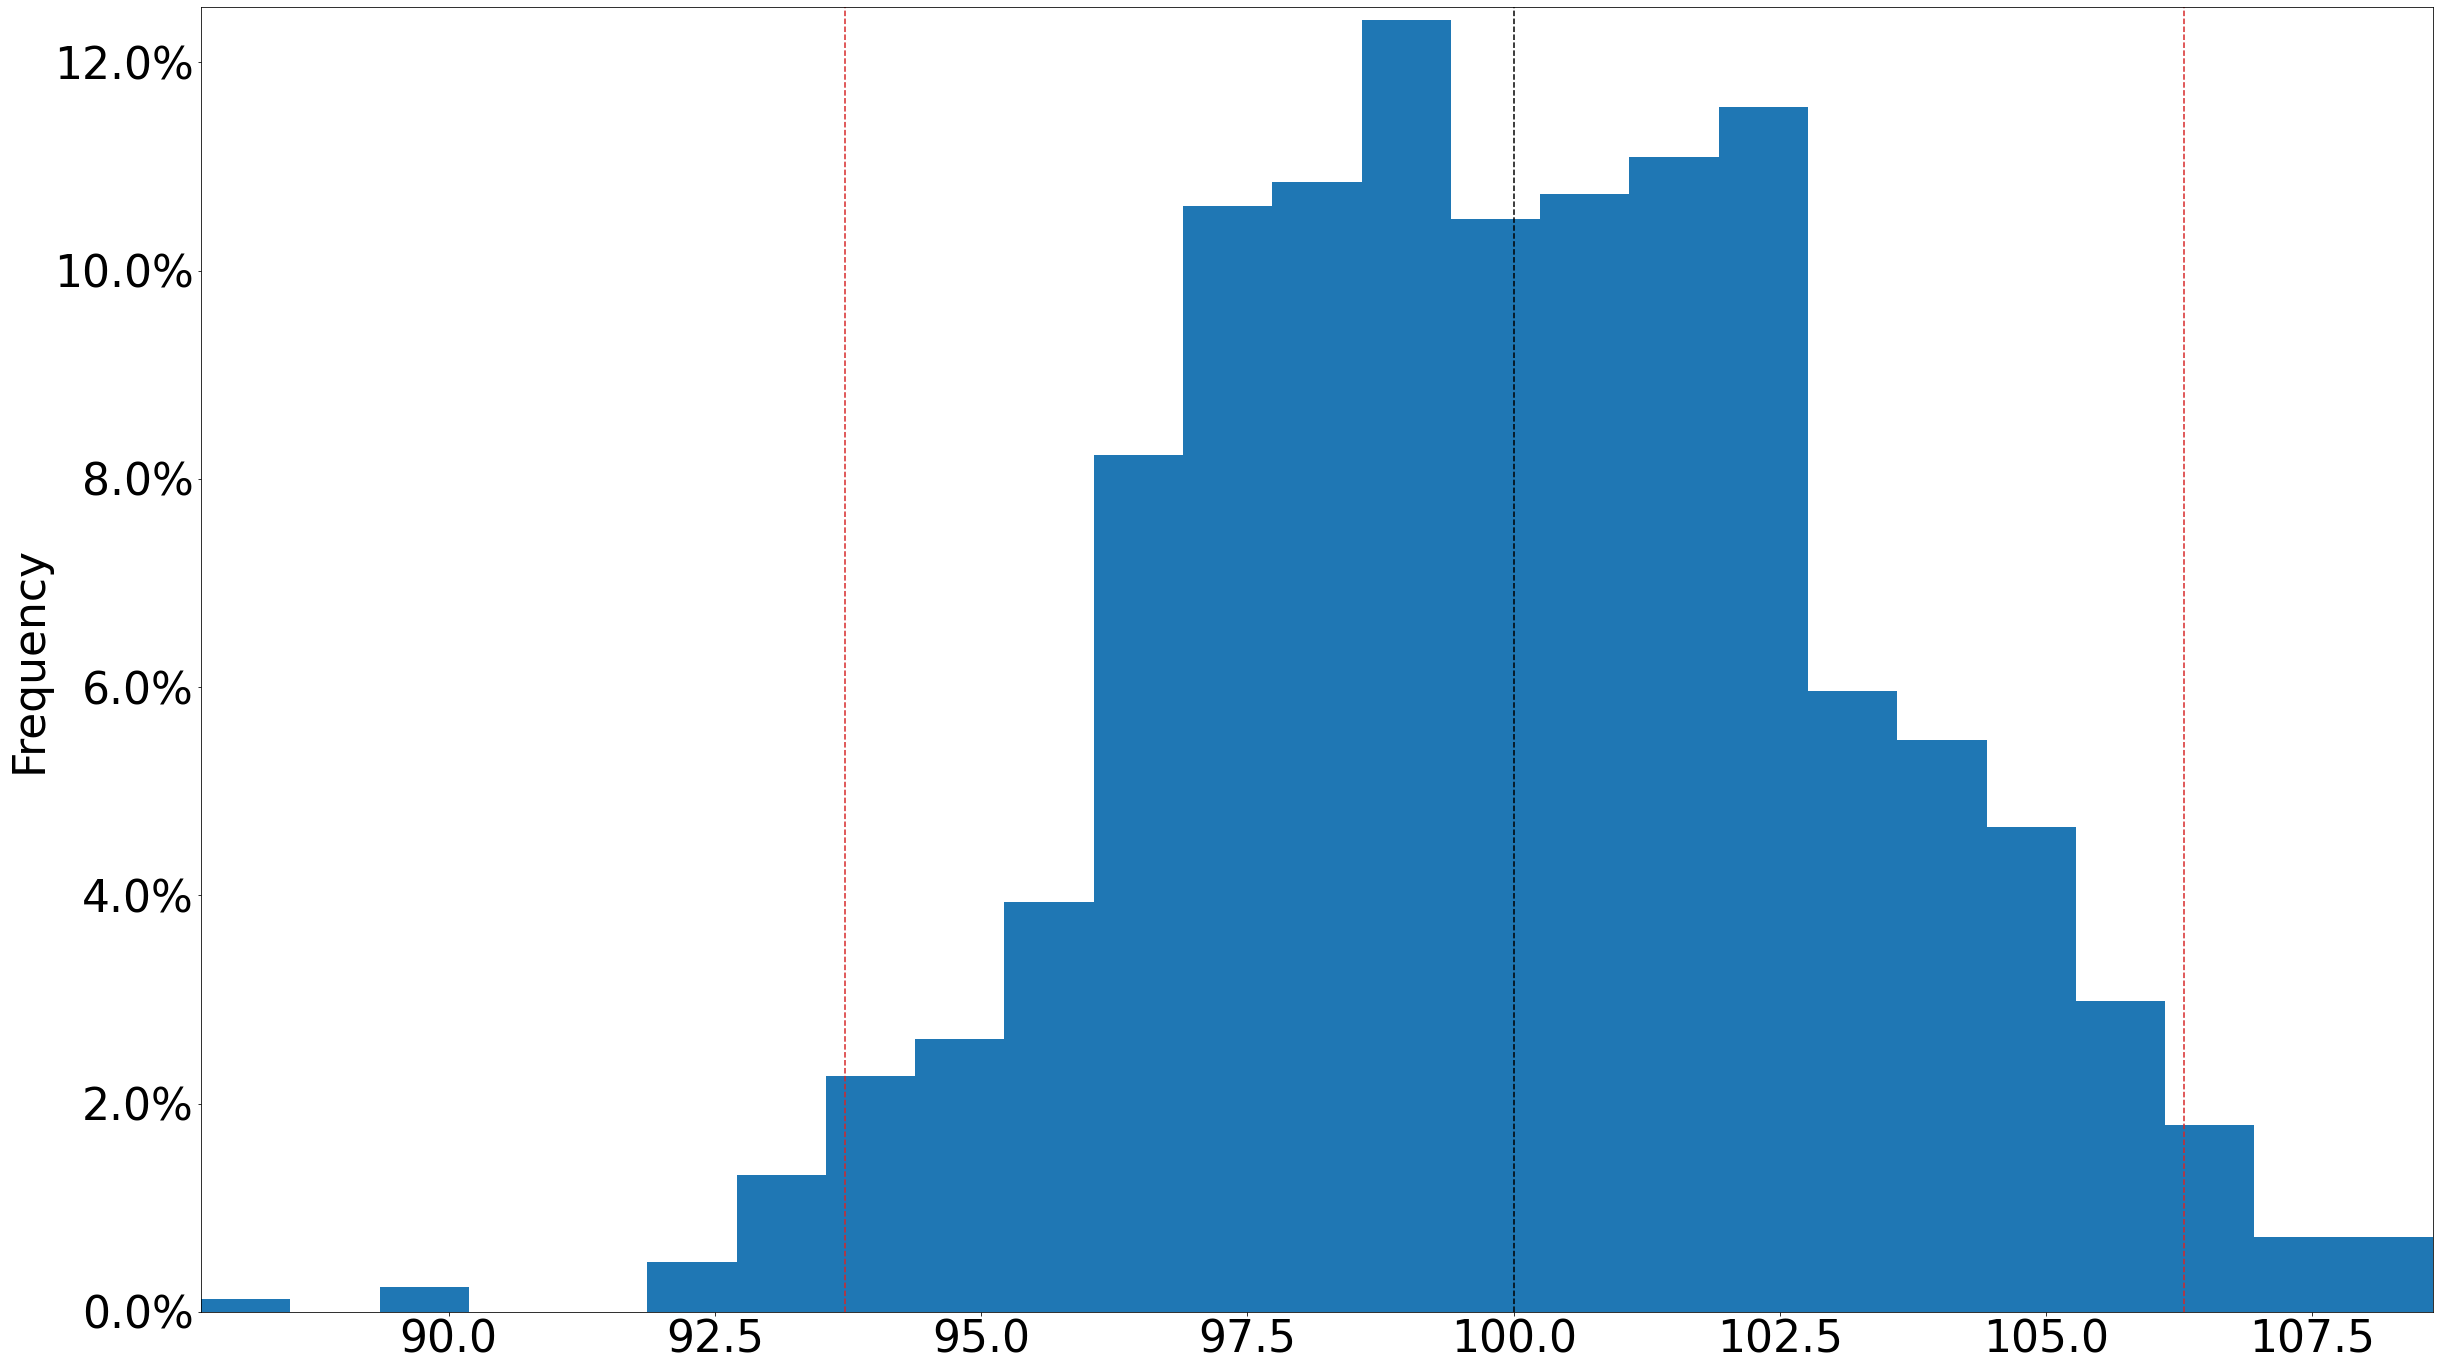

In [91]:
fig, ax = plt.subplots(figsize=(40,24))
plot_df = sim_df.iloc[-1]
plot_df= plot_df.add(100)
plot_df.plot.hist(bins=25,
                 density = True,
                 ax=ax)
ax.axvline(plot_df.mean(), ls = "--", color = "k")
ax.axvline(plot_df.mean() - plot_df.std() * 2, ls = "--", color = "C3")
ax.axvline(plot_df.mean() - plot_df.std()* -2, ls = "--", color = "C3")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(round(y*100,1))+"%" for y in y_vals])